# AE, VAE, VQ-VAE

## 1. AE Autoencoder 

## Introduction Autoencoders and their variants are powerful unsupervised deep learning models used for compressing data, learning representations, and even generating new data.

## Autoencoders are a class of unsupervised neural networks that can represent data in a lower-dimensional space, also known as latent space, to learn efficient representations. Applications include compression, denoising, feature extraction, and generative models. Autoencoders are trained by first encoding data into a latent space and then decoding them back into the original representation, also known as reconstruction, while minimizing the difference between the original input and the reconstructed data.

# Mathematical Formulation:

$$z=f_{\text {encoder }}(x)$$$$\hat{x}=g_{\text {decoder }}(z)$$


## Loss Function: The loss function is typically the Mean Squared Error (MSE) between the input x and the reconstructed input x^

# MSE Loss $=\|x-\hat{x}\|^2=\left\|x-g_{\text {decoder }}\left(f_{\text {encoder }}(x)\right)\right\|^2$

## Encodes input into a fixed vector
## Directly reconstructs input
## Limited (reconstructs seen data well)
## No regularization on latent space

# Think of an autoencoder like a photocopier:

## It takes an image and compresses it into a small, fixed-sized code.

## The decoder reconstructs the image from that code.

## If the input is distorted, the output is also distorted.

Failed to download (trying next):
HTTP Error 404: Not Found



100%|███████████████████████████████████████████████████████████████████| 9912422/9912422 [00:02<00:00, 3453405.22it/s]


Extracting data\MNIST\raw\train-images-idx3-ubyte.gz to data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|████████████████████████████████████████████████████████████████████████| 28881/28881 [00:00<00:00, 105199.18it/s]


Extracting data\MNIST\raw\train-labels-idx1-ubyte.gz to data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|████████████████████████████████████████████████████████████████████| 1648877/1648877 [00:07<00:00, 212096.91it/s]


Extracting data\MNIST\raw\t10k-images-idx3-ubyte.gz to data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|█████████████████████████████████████████████████████████████████████████| 4542/4542 [00:00<00:00, 1947309.49it/s]


Extracting data\MNIST\raw\t10k-labels-idx1-ubyte.gz to data\MNIST\raw

Epoch [1/20], Loss: 0.1844
Epoch [2/20], Loss: 0.1368
Epoch [3/20], Loss: 0.1155
Epoch [4/20], Loss: 0.1047
Epoch [5/20], Loss: 0.1048
Epoch [6/20], Loss: 0.1052
Epoch [7/20], Loss: 0.1014
Epoch [8/20], Loss: 0.0961
Epoch [9/20], Loss: 0.0934
Epoch [10/20], Loss: 0.0862
Epoch [11/20], Loss: 0.0936
Epoch [12/20], Loss: 0.0928
Epoch [13/20], Loss: 0.0899
Epoch [14/20], Loss: 0.0859
Epoch [15/20], Loss: 0.0876
Epoch [16/20], Loss: 0.0820
Epoch [17/20], Loss: 0.0883
Epoch [18/20], Loss: 0.0867
Epoch [19/20], Loss: 0.0821
Epoch [20/20], Loss: 0.0851


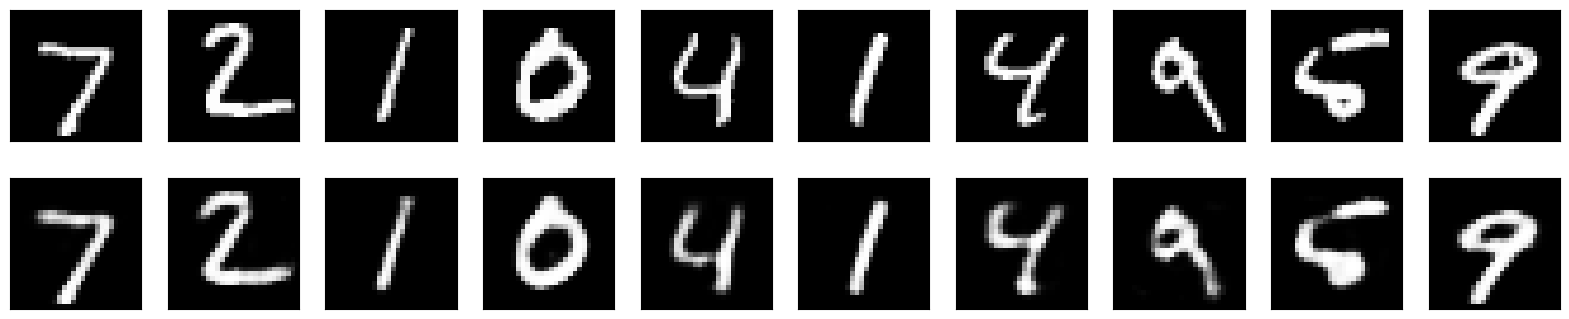

Original dimension: 784
Reduced dimension: 64


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyperparameters
num_epochs = 20
batch_size = 256
learning_rate = 0.001
encoding_dim = 64

# MNIST dataset
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = datasets.MNIST(root='data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='data', train=False, transform=transform)

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Autoencoder model
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(True),
            nn.Linear(128, encoding_dim),
            nn.ReLU(True)
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, 128),
            nn.ReLU(True),
            nn.Linear(128, 28*28),
            nn.Sigmoid()  # Ensure output is in range [0, 1]
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

model = Autoencoder().to(device)
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    for data in train_loader:
        img, _ = data
        img = img.view(img.size(0), -1).to(device)

        # Forward pass
        output = model(img)
        loss = criterion(output, img)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Testing the autoencoder
with torch.no_grad():
    for data in test_loader:
        img, _ = data
        img = img.view(img.size(0), -1).to(device)
        output = model(img)
        break

# Plot original and reconstructed images
output = output.view(output.size(0), 1, 28, 28).cpu()
img = img.view(img.size(0), 1, 28, 28).cpu()
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(img[i].numpy().squeeze(), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(output[i].numpy().squeeze(), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Use the encoder for dimensionality reduction
reduced_data = model.encoder(img.view(img.size(0), -1).to(device)).cpu().detach().numpy()
print("Original dimension:", img.view(img.size(0), -1).shape[1])
print("Reduced dimension:", reduced_data.shape[1])

In [3]:
# CNN AUTOENCODER

In [68]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Hyperparameters
batch_size = 1024
learning_rate = 1e-3
num_epochs = 20

#Device agnostic code
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
print(device)

# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Define Autoencoder model
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1),  # Output: [16, 14, 14]
            nn.ReLU(),
            nn.Conv2d(16, 32, kernel_size=3, stride=2, padding=1), # Output: [32, 7, 7]
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=7)                       # Output: [64, 1, 1]
        )
        
        # Decoder
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, kernel_size=7),             # Output: [32, 7, 7]
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, kernel_size=3, stride=2, padding=1, output_padding=1),  # [16, 14, 14]
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, kernel_size=3, stride=2, padding=1, output_padding=1),   # [1, 28, 28]
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

model = Autoencoder().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training the Autoencoder
for epoch in range(num_epochs):
    for data in train_loader:
        img, _ = data
        # img = img.view(img.size(0), -1)
        output = model(img.to(device))
        loss = criterion(output, img.to(device))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


cpu
Epoch [1/20], Loss: 0.2797
Epoch [2/20], Loss: 0.2652
Epoch [3/20], Loss: 0.1763
Epoch [4/20], Loss: 0.1117
Epoch [5/20], Loss: 0.0858
Epoch [6/20], Loss: 0.0671
Epoch [7/20], Loss: 0.0571
Epoch [8/20], Loss: 0.0505
Epoch [9/20], Loss: 0.0444
Epoch [10/20], Loss: 0.0442
Epoch [11/20], Loss: 0.0398
Epoch [12/20], Loss: 0.0376
Epoch [13/20], Loss: 0.0348
Epoch [14/20], Loss: 0.0322
Epoch [15/20], Loss: 0.0316
Epoch [16/20], Loss: 0.0301
Epoch [17/20], Loss: 0.0283
Epoch [18/20], Loss: 0.0272
Epoch [19/20], Loss: 0.0279
Epoch [20/20], Loss: 0.0262


In [69]:
from torchinfo import summary
summary(model, input_size=(1, 1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
Autoencoder                              [1, 1, 28, 28]            --
├─Sequential: 1-1                        [1, 64, 1, 1]             --
│    └─Conv2d: 2-1                       [1, 16, 14, 14]           160
│    └─ReLU: 2-2                         [1, 16, 14, 14]           --
│    └─Conv2d: 2-3                       [1, 32, 7, 7]             4,640
│    └─ReLU: 2-4                         [1, 32, 7, 7]             --
│    └─Conv2d: 2-5                       [1, 64, 1, 1]             100,416
├─Sequential: 1-2                        [1, 1, 28, 28]            --
│    └─ConvTranspose2d: 2-6              [1, 32, 7, 7]             100,384
│    └─ReLU: 2-7                         [1, 32, 7, 7]             --
│    └─ConvTranspose2d: 2-8              [1, 16, 14, 14]           4,624
│    └─ReLU: 2-9                         [1, 16, 14, 14]           --
│    └─ConvTranspose2d: 2-10             [1, 1, 28, 28]            1

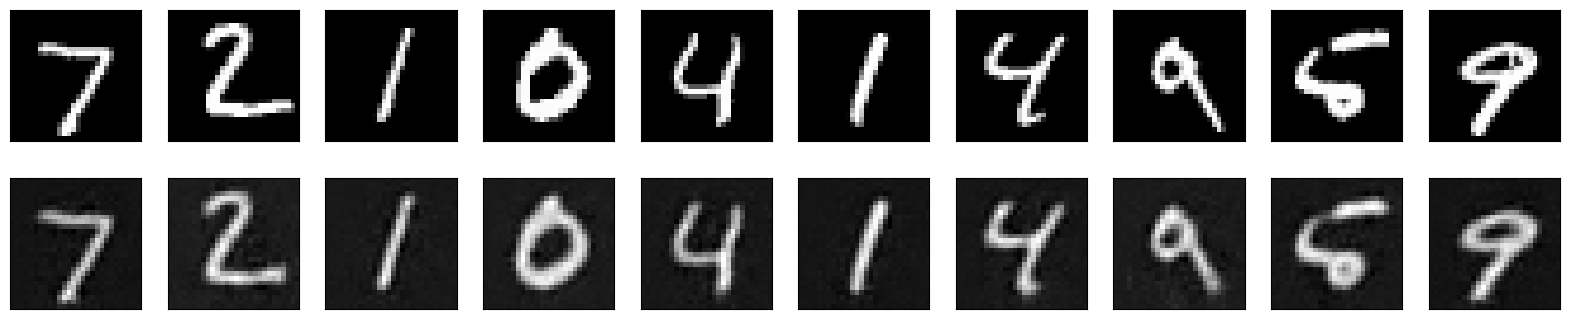

Original dimension: 784
Reduced dimension: 64


In [70]:
# Encode and decode some images
encoded_imgs = []
decoded_imgs = []
with torch.no_grad():
    for data in test_loader:
        img, _ = data
        # img = img.view(img.size(0), -1)
        encoded = model.encoder(img.to(device))
        decoded = model.decoder(encoded)
        encoded_imgs.append(encoded)
        decoded_imgs.append(decoded)

encoded_imgs = torch.cat(encoded_imgs)
decoded_imgs = torch.cat(decoded_imgs)

# Plot original and reconstructed images
n = 10  # Number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_dataset[i][0].view(28, 28).numpy(), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].view(28, 28).cpu().numpy(), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Use the encoder for dimensionality reduction
print("Original dimension:", 28 * 28)
print("Reduced dimension:", encoding_dim)

## How does ae differ from PCA In simple terms with example ?

### **PCA (Principal Component Analysis):**
- A **linear** method.
- It reduces the dimensions of data by finding new axes (called principal components) that capture the most variance.
- It’s **mathematical** and doesn’t learn from data over time.

**Example:**  
Imagine you have 100 photos of handwritten digits (like '3', '7', etc.) each of size 28x28 (784 pixels). PCA can reduce the 784 features to, say, 50 while keeping most of the important info. But it does this using linear algebra — it can’t learn complex patterns like curves or edges.

---

### **AE (Autoencoder):**
- A **neural network-based** method.
- It learns to compress data into a lower dimension and then reconstruct it.
- Can be **non-linear**, meaning it can learn more complex patterns than PCA.

**Example:**  
Using the same 100 digit images, an Autoencoder can also reduce them to 50 values. But because it's a neural network, it can learn non-linear features like curves, loops, and pixel interactions better than PCA — giving better reconstructions or features for tasks like classification.

---

### **Summary Table:**

| Feature            | PCA                         | Autoencoder (AE)               |
|--------------------|-----------------------------|-------------------------------|
| Type               | Linear                      | Can be non-linear             |
| Method             | Statistical (matrix-based)  | Neural Network                |
| Training           | No learning, just math      | Trained like a normal NN      |
| Flexibility        | Less flexible               | More flexible                 |
| Interpretability   | Easy to interpret           | Harder to interpret           |




### **How Autoencoders (AE) are used in Anomaly Detection:**

Even though Autoencoders compress data, they are actually **very useful** for detecting anomalies. Here's **how and why** it works:

---

### **The Idea:**
1. **Train the AE on normal (non-anomalous) data only.**
2. It learns how to **compress and reconstruct** this normal data accurately.
3. Later, when you give it new data:
   - If the data is **normal**, it will reconstruct it **well** (low reconstruction error).
   - If the data is **anomalous**, it will reconstruct it **poorly** (high reconstruction error), because it has **never seen** this type of data during training.

---

### **Why this works:**
Autoencoders **only learn to recreate patterns** they were trained on. So if something **unusual** comes in, they can’t recreate it well — and that **difference (error)** becomes a signal of an anomaly.

---

### **Example:**
Let’s say you’re monitoring server logs and train an autoencoder on **normal system behavior**.

- A sample normal log:
  ```
  CPU: 30%, Memory: 40%, Disk: 25%
  ```
- Anomaly log:
  ```
  CPU: 95%, Memory: 90%, Disk: 99%
  ```

If the autoencoder is trained only on normal logs, it will **struggle** to reconstruct the second (anomalous) log and show a **high reconstruction error**, flagging it as **anomaly**.

---

### **Steps in Practice:**
1. Train AE on normal data.
2. Calculate reconstruction error:  
   `error = original_data - reconstructed_data`
3. Set a threshold:  
   If `error > threshold`, mark it as anomaly.

---

In [5]:
### **1. Import Libraries**

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

In [6]:
### **2. Create Dummy Dataset**

#Let’s create a simple dataset where most data is normal, and a few points are anomalies.

# Normal data: values around 0 (e.g., 1000 samples of 10 features)
normal_data = np.random.normal(0, 1, (1000, 10))

# Anomalies: values far from 0 (e.g., 50 samples)
anomaly_data = np.random.normal(5, 1, (50, 10))

# Combine for testing
test_data = np.vstack([normal_data, anomaly_data])

# Convert to PyTorch tensors
train_tensor = torch.tensor(normal_data, dtype=torch.float32)
test_tensor = torch.tensor(test_data, dtype=torch.float32)

In [7]:
### **3. Define the Autoencoder Model**

class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(10, 6),
            nn.ReLU(),
            nn.Linear(6, 3)
        )
        self.decoder = nn.Sequential(
            nn.Linear(3, 6),
            nn.ReLU(),
            nn.Linear(6, 10)
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [8]:
### **4. Train the Autoencoder on Normal Data Only**

model = Autoencoder()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

train_loader = DataLoader(train_tensor, batch_size=32, shuffle=True)

# Training loop
for epoch in range(20):
    for batch in train_loader:
        output = model(batch)
        loss = criterion(output, batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f"Epoch [{epoch+1}/20], Loss: {loss.item():.4f}")

Epoch [1/20], Loss: 0.8223
Epoch [2/20], Loss: 0.8706
Epoch [3/20], Loss: 0.7730
Epoch [4/20], Loss: 0.7302
Epoch [5/20], Loss: 0.7552
Epoch [6/20], Loss: 0.4906
Epoch [7/20], Loss: 0.4955
Epoch [8/20], Loss: 0.7535
Epoch [9/20], Loss: 0.8334
Epoch [10/20], Loss: 0.3585
Epoch [11/20], Loss: 0.6238
Epoch [12/20], Loss: 0.6435
Epoch [13/20], Loss: 0.8018
Epoch [14/20], Loss: 0.6052
Epoch [15/20], Loss: 0.6740
Epoch [16/20], Loss: 0.5079
Epoch [17/20], Loss: 0.6136
Epoch [18/20], Loss: 0.6562
Epoch [19/20], Loss: 0.6550
Epoch [20/20], Loss: 0.6698


In [10]:
### **5. Use Reconstruction Error to Detect Anomalies**

model.eval()
with torch.no_grad():
    reconstructed = model(test_tensor)
    reconstruction_error = torch.mean((test_tensor - reconstructed) ** 2, dim=1)

In [11]:
### **6. Set a Threshold and Detect Anomalies**

# Choose a threshold — usually mean + 3*std of training error
train_reconstructed = model(train_tensor)
train_error = torch.mean((train_tensor - train_reconstructed) ** 2, dim=1)
threshold = train_error.mean() + 3 * train_error.std()

# Detect anomalies
anomalies = reconstruction_error > threshold

print(f"Detected {anomalies.sum().item()} anomalies out of {len(test_tensor)} total samples.")

Detected 63 anomalies out of 1050 total samples.


### **Summary:**
- We trained the AE on normal data.
- Calculated the reconstruction error on test data.
- If the error is high → it’s an anomaly.

Let me know if you want this with real-world data or in a notebook format.


## 1. **MSE (Mean Squared Error)**

### What is it?
MSE measures the **average squared difference** between the predicted output and the actual (ground truth) output.

### Formula:

# $\mathrm{MSE}=\frac{1}{n} \sum_{i=1}^n\left(y_i-\hat{y}_i\right)^2$

Where:
- $y_i=$ actual value
- $\hat{y}_i=$ predicted value
- $\boldsymbol{n}=$ number of elements

### Intuition:
- If prediction is close to the actual value → small error.
- If prediction is far → large squared error.
- MSE is **sensitive to large errors** (due to squaring).

### Example:
```python
y_true = [1, 2, 3]
y_pred = [1, 2.5, 2]
MSE = ((1-1)^2 + (2-2.5)^2 + (3-2)^2) / 3 = (0 + 0.25 + 1) / 3 = 0.4167
```

### Use case:
- Common in regression and reconstruction problems like Autoencoders.

---

## 2. **SSIM (Structural Similarity Index Measure)**

### What is it?
SSIM compares the **structure** and **perceptual quality** between two images. It checks **luminance (brightness), contrast, and structure**, rather than just pixel-by-pixel difference.

### Range:
- SSIM ranges from **-1 to 1**.
- **1 = perfect match**, **lower values = less similarity**.

### Formula (simplified idea):
SSIM compares two patches of images using:
- Mean (brightness)
- Variance (contrast)
- Correlation (structure)

### Intuition:
- MSE cares only about **numerical accuracy**.
- SSIM cares about **how similar the images look to a human**.
- SSIM is more useful for images — like denoising, compression, and reconstruction — where visual quality matters.

### Example:
If an image is slightly shifted or blurred, MSE might be high, but SSIM could still be close to 1 because visually they are similar.

---

## MSE vs SSIM (Summary Table):

| Feature        | MSE                                | SSIM                                  |
|----------------|-------------------------------------|----------------------------------------|
| Type           | Pixel-wise difference               | Structural/perceptual similarity       |
| Range          | 0 to ∞ (lower is better)            | -1 to 1 (higher is better)             |
| Sensitive to   | Large numerical errors              | Visual structure and perceptual loss   |
| Good for       | Regression, Autoencoder loss        | Image comparison, visual quality tasks |
| Human-friendly | No                                  | Yes                                    |

---

## When to use:
- **Use MSE** if: You need precise numeric accuracy (e.g., predicting sensor values).
- **Use SSIM** if: You care about how close the output looks to the original (e.g., image reconstruction or generation).


Let's break down the **SSIM (Structural Similarity Index Measure)** formula in **simple terms** so you can really understand what it's doing and why.

---

## 🔍 What SSIM Tries to Measure

SSIM is not just comparing pixels. It looks at:
1. **Luminance** (brightness)
2. **Contrast** (difference in light/dark)
3. **Structure** (the pattern/texture of pixels)

It compares **two images** based on these three aspects to see how structurally similar they are.

---

## ✅ SSIM Formula (Simplified)

Given two image patches **x** and **y**:

## $S S I M(x, y)=\frac{\left(2 \mu_x \mu_y+C_1\right)\left(2 \sigma_{x y}+C_2\right)}{\left(\mu_x^2+\mu_y^2+C_1\right)\left(\sigma_x^2+\sigma_y^2+C_2\right)}$

---

## ✨ What each part means:

- $\mu_x, \mu_y$ : Mean of x and y (brightness)
- $\sigma_x^2, \sigma_y^2$ : Variance of x and y (contrast)
- $\sigma_{x y}$ : Covariance of x and y (structure/pattern similarity)
- $C_1, C_2$ : Small constants to avoid divide-by-zero

---

### Step-by-step logic:

1. **Luminance** compariso
## $\frac{2 \mu_x \mu_y+C_1}{\mu_x^2+\mu_y^2+C_1}$
 
   → How similar are the **average brightness** of the two images?

2. **Contrast** compariso
## $\frac{2 \sigma_x \sigma_y+C_2}{\sigma_x^2+\sigma_y^2+C_2}$
 
   → How similar are the **brightness variations**?

3. **Structure** compariso
## $\frac{\sigma_{x y}+C_3}{\sigma_x \sigma_y+C_3}$
 
   → How similar are the **patterns**?

*In the simplified final formula, contrast and structure are often combined together.*

---

## 📘 Simple Example

Let’s say you have two grayscale image patches:

- **x** = [50, 52, 53, 51, 54]
- **y** = [49, 51, 52, 50, 53]

Now we calculat
- $\mu_x \approx 52$
- $\mu_y \approx 51$
- $\sigma_x^2 \approx 2.5$
- $\sigma_y^2 \approx 2.5$
- $\sigma_{x y} \approx 2.5$ \)

Assume:
- \( C_1 = 0.01 \), \( C_2 = 0.03 \)

Now plug into the formula:

\[
SSIM \approx \frac{(2 \cdot 52 \cdot 51 + 0.01)(2 \cdot 2.5 + 0.03)}{(52^2 + 51^2 + 0.01)(2.5 + 2.5 + 0.03)}
\]

The value will be **close to 1**, meaning the patches are structurally similar.

---

## ✅ Final Notes

- **SSIM = 1** → images are identical
- **SSIM near 0** → images are very different
- More **robust than MSE** for images that are slightly blurred, rotated, or compressed




---

### 1. **What loss function would a radiologist prefer?**

A **radiologist** cares about **important features in medical images**, like tumors, fractures, or abnormalities. These features might be **small but critical**.

#### 👉 So, they would prefer a **loss function that focuses on structure and fine details**, not just pixel accuracy.

#### 🔍 Preferred Loss:
- **SSIM (Structural Similarity Index)**  
  Because it focuses on:
  - Shape
  - Texture
  - Structure

#### ❌ Not ideal:
- **MSE** might give low error even if a tumor is blurred or slightly misplaced — which is a big deal in medicine.

#### ✅ Example:
Imagine two lung scan images:
- One is original.
- The other is slightly blurred.

MSE might say “they’re very similar.”  
But a radiologist would say, “This blur hides a tiny tumor!”

**SSIM would catch this better**, because it cares about the **structure** of the image.

---

### 2. **How can we ensure critical info isn't lost?**

We can do a few things to **protect important medical details** during model training or compression:

#### ✅ Techniques:

1. **Use SSIM-based loss**  
   Helps the model preserve structure — like edges of a tumor.

2. **Combine SSIM and MSE**  
   This balances **pixel accuracy + visual/structural clarity**.  
   Example:
   ```python
   total_loss = 0.5 * MSE + 0.5 * (1 - SSIM)
   ```

3. **Use attention mechanisms**  
   These tell the model to **focus more on critical regions**, like the lungs, brain, etc.

4. **Get feedback from radiologists**  
   Let experts check model output — helps catch missing details early.

5. **Use segmentation maps or masks**  
   Highlight key regions (e.g., tumor area), so the model doesn’t lose them during training.

---

### 🔁 Summary:

| Question | Simple Answer |
|---------|---------------|
| What loss would a radiologist prefer? | **SSIM** (because it preserves medical structure/details) |
| How to avoid losing critical info? | Use **SSIM**, maybe combine with MSE, use **attention**, and include expert feedback |


# Here's a **simple example of how to apply an Autoencoder (AE) to audio data using PyTorch** — in **English**, step-by-step.

## ✅ Goal:  
Compress and reconstruct audio using an Autoencoder.

---

## 🧾 Steps:

### 1. **Load an audio file**  
You can use `torchaudio` (recommended by PyTorch) to load audio.

```python
import torchaudio

waveform, sample_rate = torchaudio.load("example.wav")
print(waveform.shape)  # (channels, time)
```

For simplicity, let’s use mono audio:

```python
audio = waveform[0]  # shape: (time,)
```

---

### 2. **Preprocess the audio**  
Make it into a fixed-size input (e.g., 16000 samples = 1 second if sample rate = 16kHz)

```python
import torch

# Pad or cut the audio to 1 second (16000 samples)
target_length = 16000
if audio.shape[0] > target_length:
    audio = audio[:target_length]
else:
    audio = torch.nn.functional.pad(audio, (0, target_length - audio.shape[0]))
```

---

### 3. **Define the Autoencoder (AE) model**

```python
import torch.nn as nn

class AudioAutoencoder(nn.Module):
    def __init__(self):
        super(AudioAutoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(16000, 4000),
            nn.ReLU(),
            nn.Linear(4000, 1000),
            nn.ReLU(),
            nn.Linear(1000, 128),  # compressed representation
        )
        self.decoder = nn.Sequential(
            nn.Linear(128, 1000),
            nn.ReLU(),
            nn.Linear(1000, 4000),
            nn.ReLU(),
            nn.Linear(4000, 16000),
            nn.Tanh()  # because audio is in range [-1, 1]
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded
```

---

### 4. **Train the AE**

```python
model = AudioAutoencoder()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

audio = audio.unsqueeze(0)  # add batch dimension, shape: (1, 16000)

for epoch in range(100):
    optimizer.zero_grad()
    output = model(audio)
    loss = criterion(output, audio)
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch}, Loss: {loss.item():.4f}")
```

---

### 5. **Reconstruct and save the audio**

```python
reconstructed = output.detach().squeeze(0)
torchaudio.save("reconstructed.wav", reconstructed.unsqueeze(0), sample_rate)
```

---

## 🔁 Summary

- Load audio with `torchaudio`
- Resize it to fixed length
- Build a linear AE model
- Train using MSE loss
- Save the reconstructed output

---

Let me know if you want to try:
- Using spectrograms instead of raw audio
- A convolutional AE for better results
- Applying this to a dataset like [UrbanSound8K or ESC-50] for real training

I can guide you through those too.

Let's go through all of this **step-by-step** in **simple English with examples**:

---

## 1. **Learn Probabilistic Encoding (used in VAE)**

In **normal Autoencoders**, the encoder gives you a single point in the latent space (like a vector `[0.2, 0.5, ...]`).

But in **Variational Autoencoders (VAE)**, the encoder doesn’t give a single point — it gives a **distribution** (mean `μ` and standard deviation `σ`).

### 🔍 Why?
Because real-world data (like images, audio) is **not just one value** in latent space — it's more like a **cloud of possibilities**. We want the model to learn **probabilities** so it can:
- Sample new data
- Be more flexible in generation

---

## 2. **Understand KL Divergence**

**KL divergence** is a way to measure how **one probability distribution is different from another**.

In VAE:
- We want the latent distribution (`q(z|x)`) to be **close to** a standard normal distribution (`N(0,1)`)
- KL divergence tells us **how far off** it is, and we use it as a **regularizer** during training

### Simple analogy:
Think of KL divergence like comparing two different clouds. If your latent cloud is very far from the ideal cloud (`N(0,1)`), the model is penalized.

---



Here’s a detailed explanation of KL Divergence Loss with:

- The **formula** of KL Divergence
- **Implementation in PyTorch and NumPy**
- **Plots** of different distributions to visualize divergence

---

### 🔸 **KL Divergence: Formula**

The Kullback-Leibler Divergence (KL Divergence) measures how one probability distribution \( Q \) diverges from a second, expected probability distribution \( P \).


**Formula:**

$$D_{\text{KL}}(P \parallel Q) = \sum_{i} P(i) \log \left( \frac{P(i)}{Q(i)} \right)$$

Or in continuous for)$$D_{\text{KL}}(P \parallel Q) = \int P(x) \log \left( \frac{P(x)}{Q(x)} \right) dx$$

It is  **not symmetric** , meaning:

$$D_{\text{KL}}(P \parallel Q) \neq D_{\text{KL}}(Q \parallel P)$$ \| P)
\]


In [71]:
### 🔸 **PyTorch Implementation**

import torch
import torch.nn.functional as F

# Example distributions
P = torch.tensor([0.1, 0.4, 0.5])  # Target
Q = torch.tensor([0.2, 0.2, 0.6])  # Prediction

# Ensure numerical stability (avoid log(0))
P = P + 1e-10
Q = Q + 1e-10

# KL Divergence (batch form)
kl_div = F.kl_div(Q.log(), P, reduction='sum')  # Note: Q should be log-probabilities
print(f"KL Divergence (PyTorch): {kl_div.item()}")

KL Divergence (PyTorch): 0.11678335070610046


In [72]:
### 🔸 **NumPy Implementation**

import numpy as np

# Example distributions
P = np.array([0.1, 0.4, 0.5])  # Target
Q = np.array([0.2, 0.2, 0.6])  # Prediction

# Ensure numerical stability
P += 1e-10
Q += 1e-10

# Compute KL Divergence
kl_div = np.sum(P * np.log(P / Q))
print(f"KL Divergence (NumPy): {kl_div}")

KL Divergence (NumPy): 0.11678337571944084


KL(P || Q1) = 0.4987
KL(P || Q2) = 0.2723
KL(P || Q3) = 7.6187


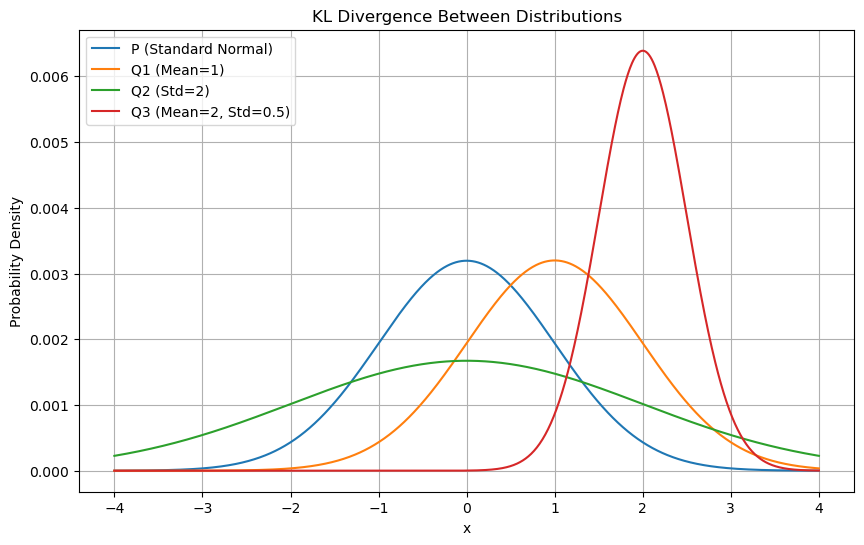

In [73]:
### 🔸 **Plot Different Distributions**

# Let’s visualize how KL divergence changes with different distributions.


import matplotlib.pyplot as plt
import seaborn as sns

# Create x-axis
x = np.linspace(-4, 4, 1000)

# Distributions
from scipy.stats import norm

P = norm.pdf(x, loc=0, scale=1)    # Standard normal
Q1 = norm.pdf(x, loc=1, scale=1)   # Shifted mean
Q2 = norm.pdf(x, loc=0, scale=2)   # Larger variance
Q3 = norm.pdf(x, loc=2, scale=0.5) # Shifted & narrower

# Normalize for valid PDFs
P /= np.sum(P)
Q1 /= np.sum(Q1)
Q2 /= np.sum(Q2)
Q3 /= np.sum(Q3)

# KL divergence
def kl_divergence(p, q):
    p = p + 1e-10
    q = q + 1e-10
    return np.sum(p * np.log(p / q))

print(f"KL(P || Q1) = {kl_divergence(P, Q1):.4f}")
print(f"KL(P || Q2) = {kl_divergence(P, Q2):.4f}")
print(f"KL(P || Q3) = {kl_divergence(P, Q3):.4f}")

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=x, y=P, label='P (Standard Normal)')
sns.lineplot(x=x, y=Q1, label='Q1 (Mean=1)')
sns.lineplot(x=x, y=Q2, label='Q2 (Std=2)')
sns.lineplot(x=x, y=Q3, label='Q3 (Mean=2, Std=0.5)')
plt.title("KL Divergence Between Distributions")
plt.xlabel("x")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)
plt.show()

### Summary:

| Distribution | KL(P‖Q) |
|--------------|---------|
| Q1 (mean shift) | moderate |
| Q2 (variance change) | smaller |
| Q3 (shift + narrow) | large |

**Conclusion**: The more different Q is from P, the higher the KL divergence. It’s used heavily in machine learning for comparing predicted distributions against target ones (like in VAEs, NLP, etc).

If you want the above code as a single notebook or want to use it for a deep learning application like VAEs, let me know.

# Applications of KL Divergence in Data Science
Optimizing KL Divergence accuracy in machine learning hinges on selecting the best Python hosting service, necessitating ample computational power, customized ML environments, and seamless data integration to streamline model training and inference processes effectively.

# Monitoring Data Drift
One of the most common use cases of KL divergence in machine learning is to detect drift in datasets. Data is constantly changing, and a metric is required to assess the significance of the changes.

Constantly monitoring data allows machine learning teams to decide whether automated tasks such as model re-training are required. It also provides insights regarding the variable nature of the data under consideration and helps draw statistical analysis.

KL divergence is applied to data in discrete form by forming data bins. The data points are binned according to the features to form discrete distributions, i.e., each feature is independently processed for divergence calculation. The divergence scores for each bin are summed up to get a final picture.

### **What is a Variational Autoencoder (VAE)?**
A **Variational Autoencoder (VAE)** is a type of autoencoder that learns to encode data into a **probabilistic distribution** rather than a fixed set of features. This makes VAEs useful for generating new, realistic data samples.  

### **How is VAE Different from a Regular Autoencoder?**
| Feature | Autoencoder (AE) | Variational Autoencoder (VAE) |
|---------|-----------------|------------------------------|
| **Latent Space** | Encodes input into a **fixed vector** | Encodes input into a **probability distribution** (mean & variance) |
| **Reconstruction** | Directly reconstructs input | Samples from the distribution to reconstruct |
| **Generative Capability** | Limited (reconstructs seen data well) | Strong (can generate new, unseen data) |
| **Regularization** | No regularization on latent space | Uses **KL divergence** to enforce structured latent space |

---

### **Example to Understand the Difference**
#### **Autoencoder**
Think of an autoencoder like a photocopier:
- It takes an image and compresses it into a small, fixed-sized code.
- The decoder reconstructs the image from that code.
- If the input is distorted, the output is also distorted.

#### **VAE**
Think of a VAE like an **artist trained to imagine variations**:
- It does not store a single fixed code but **stores distributions** (mean & variance).
- When generating new data, it can sample from these distributions, leading to variations.

In [16]:
## 3. **Implement VAE in PyTorch (simple example)**

# We'll use **MNIST** digits dataset here.

### 🔧 Step-by-step:

### Step 1: Import and prepare dataset

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

transform = transforms.ToTensor()
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

In [22]:
### Step 2: Define VAE model

class VAE(nn.Module):
    def __init__(self):
        super(VAE, self).__init__()
        self.encoder = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 400),
            nn.ReLU()
        )
        self.fc_mu = nn.Linear(400, 20)   # mean
        self.fc_logvar = nn.Linear(400, 20)  # log(variance)
        
        self.decoder = nn.Sequential(
            nn.Linear(20, 400),
            nn.ReLU(),
            nn.Linear(400, 28*28),
        )

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std  # sample from latent space

    def forward(self, x):
        x = self.encoder(x)
        mu = self.fc_mu(x)
        logvar = self.fc_logvar(x)
        z = self.reparameterize(mu, logvar)
        x_recon = self.decoder(z)
        return x_recon, mu, logvar

In [25]:
### Step 3: Define loss function

# def vae_loss(recon_x, x, mu, logvar):
#     BCE = nn.functional.binary_cross_entropy(recon_x, x.view(-1, 28*28), reduction='sum')
#     KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
#     return BCE + KLD

def vae_loss(recon_x, x, mean, logvar):
    recon_loss = nn.functional.mse_loss(recon_x, x.view(-1, 28*28), reduction='sum')
    kl_div = -0.5 * torch.sum(1 + logvar - mean.pow(2) - logvar.exp())
    return recon_loss + kl_div

# def vae_loss_weighted(recon_x, x, mu, logvar, beta=0.1):
#     MSE = nn.functional.mse_loss(recon_x, x.view(-1, 28*28), reduction='sum')
#     KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
#     return MSE + beta * KLD

In [26]:
### Step 4: Train the model

model = VAE()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

for epoch in range(10):
    model.train()
    total_loss = 0
    for batch in train_loader:
        x, _ = batch
        optimizer.zero_grad()
        x_recon, mu, logvar = model(x)
        loss = vae_loss(x_recon, x, mu, logvar)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {total_loss:.2f}")

Epoch 1, Loss: 2391754.45
Epoch 2, Loss: 2072968.86
Epoch 3, Loss: 2014671.06
Epoch 4, Loss: 1977362.25
Epoch 5, Loss: 1952784.82
Epoch 6, Loss: 1936132.83
Epoch 7, Loss: 1919982.16
Epoch 8, Loss: 1907553.99
Epoch 9, Loss: 1899193.47
Epoch 10, Loss: 1891480.83


In [28]:
from torchinfo import summary
summary(model,)

Layer (type:depth-idx)                   Param #
VAE                                      --
├─Sequential: 1-1                        --
│    └─Flatten: 2-1                      --
│    └─Linear: 2-2                       314,000
│    └─ReLU: 2-3                         --
├─Linear: 1-2                            8,020
├─Linear: 1-3                            8,020
├─Sequential: 1-4                        --
│    └─Linear: 2-4                       8,400
│    └─ReLU: 2-5                         --
│    └─Linear: 2-6                       314,384
Total params: 652,824
Trainable params: 652,824
Non-trainable params: 0

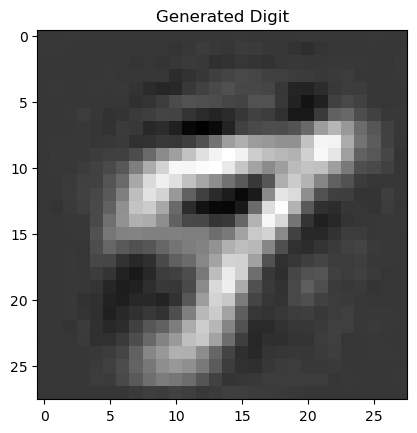

In [29]:
### Step 5: Generate new digits from VAE

import matplotlib.pyplot as plt

with torch.no_grad():
    z = torch.randn(1, 20)  # random sample from N(0,1)
    sample = model.decoder(z).view(28, 28)
    plt.imshow(sample, cmap='gray')
    plt.title("Generated Digit")
    plt.show()

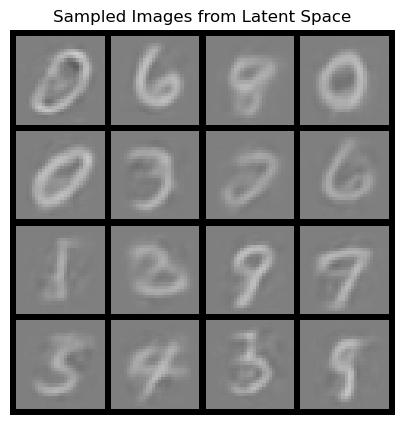

In [30]:
import torch
import matplotlib.pyplot as plt
from torchvision.utils import make_grid

# Assuming your trained model is already declared as:
# model = VAE()
model.eval()  # Set to evaluation mode

# Function to sample and decode from the latent space
def sample_and_generate(model, num_samples=16, latent_dim=20):
    with torch.no_grad():
        z = torch.randn(num_samples, latent_dim)  # Sample from N(0,1)
        generated = model.decoder(z)
        generated = torch.sigmoid(generated)  # Normalize to [0,1] for image display
        generated = generated.view(-1, 1, 28, 28)  # Reshape to image format
        return generated

# Generate sample images
samples = sample_and_generate(model, num_samples=16)

# Display the images in a grid
def show_images(img_tensor, title="Sampled Images from Latent Space"):
    grid = make_grid(img_tensor, nrow=4, padding=2)
    plt.figure(figsize=(5,5))
    plt.imshow(grid.permute(1, 2, 0).squeeze(), cmap="gray")
    plt.title(title)
    plt.axis("off")
    plt.show()

show_images(samples)



---

### **Key Differences in Code**
1. **Latent Space in AE vs VAE**
   - **AE**: Encodes directly into a latent vector.
   - **VAE**: Encodes into **mean and log-variance**, then samples using the **reparameterization trick**.

2. **Reconstruction**
   - **AE**: Directly reconstructs from the encoded vector.
   - **VAE**: Samples from a **probabilistic distribution** before reconstructing.

3. **Loss Function**
   - **AE**: Uses only **MSE loss**.
   - **VAE**: Uses **MSE loss + KL divergence** to regularize the latent space.

---

Here’s a simple **comparison table** highlighting the key differences between **Autoencoder (AE)** and **Variational Autoencoder (VAE)**:

| Feature                     | Autoencoder (AE)                                | Variational Autoencoder (VAE)                           |
|----------------------------|--------------------------------------------------|----------------------------------------------------------|
| **Latent Space**           | Fixed, deterministic                             | Probabilistic (learns mean and variance)                |
| **Encoder Output**         | Single latent vector                             | Mean and log-variance of a distribution                 |
| **Decoder Input**          | Latent vector directly                           | Sampled vector from learned distribution                |
| **Loss Function**          | Reconstruction Loss (e.g., MSE)                  | Reconstruction Loss + KL Divergence                    |
| **Sampling**               | No sampling step                                 | Sampling from learned distribution                     |
| **Generative Capability**  | Limited                                          | Strong (can generate new realistic data)               |
| **Regularization**         | Not explicitly regularized                       | Regularized via KL divergence                          |
| **Use in Anomaly Detection** | Based on reconstruction error                 | Based on reconstruction + latent space distribution    |
| **Interpretability**       | Hard to interpret latent space                   | Latent space has structure (follows normal distribution)|
| **Applications**           | Denoising, compression                           | Generation, anomaly detection, representation learning |

Let me know if you want a visual version of this table or a downloadable one (PDF/CSV).

### **Summary**
- **Autoencoders** are great for **compression & denoising**.
- **VAEs** are great for **generating new, realistic data**.
- **VAEs** use **probabilistic encoding** and a **KL divergence loss** to regularize the latent space.
- **VAEs** allow meaningful latent space operations (e.g., interpolating between images).


Let’s break down both your questions in simple terms with detailed examples:

---

## ✅ 1. **Why sample from a distribution in a VAE?**

### 🔍 The Big Idea:
In a **Variational Autoencoder (VAE)**, instead of encoding an image into a single point (like a regular autoencoder), we encode it into a **distribution** — usually a **Gaussian (normal) distribution**.

### 🔸Why?  
To make the **latent space continuous and smooth**, so we can:
- **Generate new similar data** by sampling from the space.
- **Interpolate** between data points (generate in-between samples).
- **Handle uncertainty** (e.g., two inputs that are similar but not exactly the same can map to slightly different points).

### 🔸How?  
For each input image, the encoder gives us:
- A mean (`μ`)
- A standard deviation (via `logσ²`)

From these, we sample a **latent vector `z`** like this:
```python
z = μ + σ * ε   # where ε is random noise from N(0,1)
```

This is called the **reparameterization trick** – it lets us train using gradients even though we're sampling.

---

### 🧠 Example (Simple):
Imagine you’re compressing faces:

- Regular AE: One image → One point → Decoder reconstructs that face.
- VAE: One image → A **cloud** of points (a distribution) → Decoder can generate **many similar faces** by sampling from that cloud.

That randomness allows us to **generate** new content and **generalize** better.

---

## ✅ 2. **Can VAE help with rare disease detection?**

Yes, VAEs can be **very useful for anomaly detection**, including detecting **rare diseases** in medical data.

---

### 🔍 How it works (in simple steps):

1. **Train the VAE on only normal (healthy) data**.
2. It learns to **reconstruct healthy patterns** (images, signals, etc.).
3. Now give it **new data**, possibly with a disease.
4. If the data is **different from normal**, the VAE:
   - Will **fail to reconstruct it properly**.
   - Will have a **high reconstruction error**.
5. We set a **threshold**, and anything with a high error is flagged as **anomalous**.

---

### 🧠 Example (Medical Imaging):

- **Input**: Chest X-rays of healthy patients.
- Train a VAE to reconstruct these images.
- Now, give it a chest X-ray of a patient with **rare lung disease**.
- Since the VAE never saw such patterns during training, it **struggles to reconstruct**.
- Result: **High error** → **Potential rare disease**.

You can visualize the error as a heatmap:
```python
error = (input_image - reconstructed_image) ** 2
plt.imshow(error, cmap="hot")
```
This can even **highlight abnormal regions**.

---

### ✅ Why VAE is Good for Rare Disease Detection:
- Doesn’t need a lot of diseased data (just train on normal).
- Learns the "norm" and flags anything abnormal.
- Works with images, signals (like ECG), or structured medical records.

---

### Summary:

| Concept | Simple Explanation |
|--------|---------------------|
| **Sampling from distribution** | Makes model more flexible, allows generation and smooth latent space. |
| **VAE for rare disease** | Learns healthy data → flags abnormal cases via high reconstruction error. |

---


In [ ]:
#####################################################################################################################

Great question — and you're thinking in the right direction! Let's clarify **how VAE works for anomaly detection**, especially since it samples and generates **new-like images**, not exact copies.

---

### 🔍 Your concern:
> “If VAE learns from a distribution and generates new images, how can it detect anomalies? Won’t the output always be different?”

That’s a **valid doubt**, so let’s break it down clearly.

---

## ✅ The Key Insight:

**Even though VAEs generate slightly new images (due to sampling), they are still trained to reconstruct inputs as accurately as possible — *if* the input is similar to what they've seen.**

---

### ✅ What happens during training?

- The VAE is trained on **normal (healthy)** data.
- It learns:
  - How to encode normal inputs into the latent space (mean + variance).
  - How to decode that latent space back into the **original input**.

So:  
**Input (normal image) → Encoder → Latent space → Decoder → Output (reconstructed normal image)**

---

### ✅ What happens during anomaly detection?

- You input an **abnormal image** (e.g., image with disease).
- VAE tries to encode and decode it using what it learned from **only normal images**.
- Result: **Poor reconstruction** because the VAE never learned to model that abnormal pattern.

👉 **Reconstruction error becomes large**  
→ This error becomes your anomaly score.

---

### 🔍 Visual Example:

Let’s say your VAE is trained only on clean handwritten digits (like digit “3” from MNIST):

- You input a clean “3” → output looks like “3” → low error ✅
- You input a corrupted “3” (missing stroke) → output looks like clean “3” → **mismatch → high error** ❌
- You input a different digit like “7” → output still looks like “3” → high error ❌

---

### 🔬 In medical use:

Trained only on **healthy brain MRIs**:

- Healthy scan → VAE reconstructs it well → **low error** ✅
- Tumor scan → VAE reconstructs it as **a normal brain** → tumor is **not present in the output** → **high error in tumor region** ❌

That’s how you can even localize where the anomaly is.

---

### 🧠 Why this works despite sampling?

Because:
- You **sample only once per input**, so the output is not entirely random.
- The decoder is trained to **approximate the original input**, not just generate any image.

Even though VAE introduces some randomness, it **tries to match the input as closely as it can** using its learned distribution.

---

## ✅ Summary:

| Concern | Clarification |
|--------|---------------|
| VAE samples from a distribution | Yes, but it's centered around the input’s mean. Sampling adds slight variation, not drastic changes. |
| Output is different every time | Slightly different, but close to the input — **if** the input is normal. |
| Can it still detect anomaly? | Yes — anomalies lead to **poor reconstructions** → **high error** → anomaly detected. |

---

Would you like me to show a code example using VAE for detecting anomalies in MNIST or medical image data?

# which one of them have better anomaly detection and why ?

**VAE generally performs better for anomaly detection** compared to a standard Autoencoder because it learns a structured, probabilistic latent space by modeling the data distribution. This allows the VAE to better understand what "normal" data looks like and assign low probability to out-of-distribution or anomalous inputs. During testing, if the input significantly deviates from the learned normal distribution, the VAE struggles to reconstruct it accurately, resulting in a higher reconstruction error or a low likelihood in latent space—both of which can be used to flag anomalies. In contrast, a regular AE might overfit and memorize patterns without capturing the underlying data distribution, making it less robust in detecting subtle or unseen anomalies.

Exploring the **latent space with sampling** is a powerful idea, especially in **Variational Autoencoders (VAEs)**. Here's a simple explanation:

---

### 🔍 What is the latent space?
In VAE, the **latent space** is a compressed representation of the input data. Each input (like a medical image) gets mapped to a **distribution**—usually a **Gaussian** defined by a **mean (μ)** and **standard deviation (σ)**.

Instead of just using this as-is, we **sample** a latent vector `z` from this distribution:

\[
z = \mu + \sigma \cdot \epsilon
\]
Where \(\epsilon\) is random noise drawn from a standard normal distribution \(N(0,1)\).

---

### 🧪 Why sample from it?

Sampling allows us to:
1. **Generate new data** by sampling random `z` values and passing them through the decoder.
2. **Visualize the latent space** by smoothly varying values of `z` to see how the output changes.
3. **Detect anomalies**: If an input maps to a latent region the model hasn’t learned well (i.e., low probability), it's likely an anomaly.

---

### 🧠 Example: Medical Images

Imagine a VAE trained on **normal brain MRIs**. Each normal image gets encoded into a point in latent space. When we sample points close to this cluster, the decoder can generate realistic normal brain scans.

Now, if we input an **anomalous image** (e.g., a tumor), it maps to a region far from the learned normal cluster. The decoder either:
- Can’t reconstruct it well (high error)
- Produces a generic “normal” brain, revealing the anomaly via mismatch.

---

### 🧭 Visual Exploration

In 2D latent space, we can create a grid of `z` values, decode each one, and **visualize the transition** across the space. This helps understand:
- How similar inputs group together.
- Where anomalies might fall (in low-density regions).

---


# CVAE

To add a **Conditional VAE (CVAE)** for labeled data like MNIST (where each image has a digit label from 0–9), you need to **condition both the encoder and decoder** on the label. This is done by concatenating the one-hot encoded label vector with the input image (for the encoder) and with the latent vector (for the decoder).

---

### ✅ Key Concept of CVAE:
> **Input = [Image, Label]**  
> **Latent Code = z ~ q(z | x, y)**  
> **Output = Decoder([z, y])**

---

In [40]:
### 🧱 Step-by-Step PyTorch Code for CVAE on MNIST

import torch
import torch.nn as nn
import torch.nn.functional as F

class CVAE(nn.Module):
    def __init__(self, latent_dim=20):
        super(CVAE, self).__init__()
        self.latent_dim = latent_dim
        self.label_dim = 10  # 10 classes for MNIST

        # Encoder: image + label
        self.encoder = nn.Sequential(
            nn.Linear(28*28 + self.label_dim, 400),
            nn.ReLU()
        )
        self.fc_mu = nn.Linear(400, latent_dim)
        self.fc_logvar = nn.Linear(400, latent_dim)

        # Decoder: latent + label
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim + self.label_dim, 400),
            nn.ReLU(),
            nn.Linear(400, 28*28),
            nn.Sigmoid()
        )

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def forward(self, x, y):
        batch_size = x.size(0)
        x = x.view(batch_size, -1)
        y_onehot = F.one_hot(y, num_classes=self.label_dim).float()

        # Concatenate input with label
        x_cond = torch.cat([x, y_onehot], dim=1)
        hidden = self.encoder(x_cond)
        mu = self.fc_mu(hidden)
        logvar = self.fc_logvar(hidden)
        z = self.reparameterize(mu, logvar)

        # Decode with label
        z_cond = torch.cat([z, y_onehot], dim=1)
        recon = self.decoder(z_cond)
        return recon, mu, logvar

In [41]:
### 🧪 CVAE Loss Function

def cvae_loss(recon_x, x, mu, logvar):
    recon_loss = F.binary_cross_entropy_with_logits(recon_x, x.view(-1, 28*28), reduction='sum')
    kl_div = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return recon_loss + kl_div

In [42]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CVAE().to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-3)


In [43]:
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        recon, mu, logvar = model(images, labels)
        loss = cvae_loss(recon, images, mu, logvar)
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss / len(train_loader.dataset):.4f}")



Epoch [1/10], Loss: 545.8662
Epoch [2/10], Loss: 542.1307
Epoch [3/10], Loss: 541.6104
Epoch [4/10], Loss: 541.2398
Epoch [5/10], Loss: 540.8670
Epoch [6/10], Loss: 540.6673
Epoch [7/10], Loss: 540.4934
Epoch [8/10], Loss: 540.2620
Epoch [9/10], Loss: 540.0193
Epoch [10/10], Loss: 539.7580


## ✅ Visualize Samples from Conditional Latent Space

In [44]:
import matplotlib.pyplot as plt
from torchvision.utils import make_grid

def generate_cvae_samples(model, digit, num_samples=16, latent_dim=20, device='cpu'):
    model.eval()
    with torch.no_grad():
        # Sample from standard normal
        z = torch.randn(num_samples, latent_dim).to(device)

        # Create a label vector (all the same digit)
        y = torch.full((num_samples,), digit).to(device)  # e.g., digit = 3
        y_onehot = F.one_hot(y, num_classes=10).float()

        # Concatenate z and label
        z_cond = torch.cat([z, y_onehot], dim=1)

        # Generate images
        gen = model.decoder(z_cond)
        gen = torch.sigmoid(gen).view(-1, 1, 28, 28)  # reshape for display
        return gen


## 🖼️ Display the Images in a Grid

In [45]:
def show_images(img_tensor, title="Generated Images"):
    grid = make_grid(img_tensor, nrow=4, padding=2)
    plt.figure(figsize=(5,5))
    plt.imshow(grid.permute(1, 2, 0).squeeze(), cmap="gray")
    plt.title(title)
    plt.axis("off")
    plt.show()


## 🚀 Example Usage

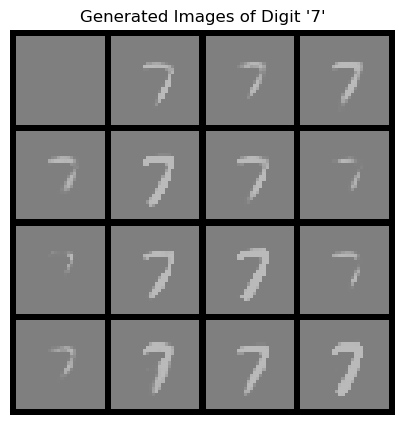

In [46]:
digit = 7  # Try changing this to any digit 0-9
samples = generate_cvae_samples(model, digit=digit, device=device)
show_images(samples, title=f"Generated Images of Digit '{digit}'")


## 🔄 Try Different Digits:

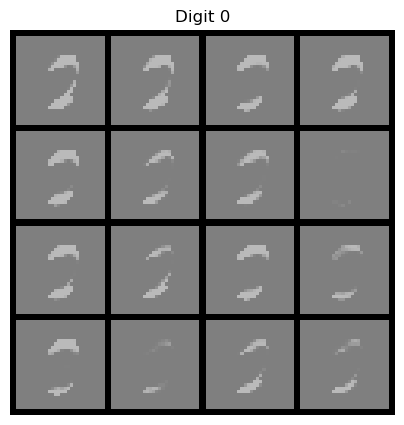

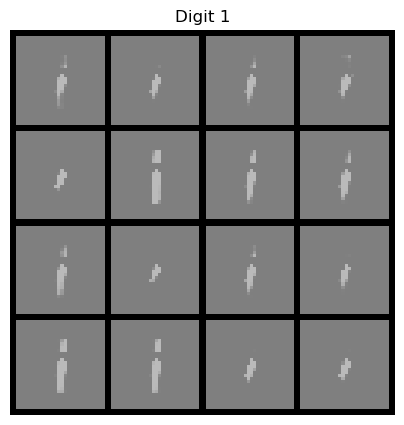

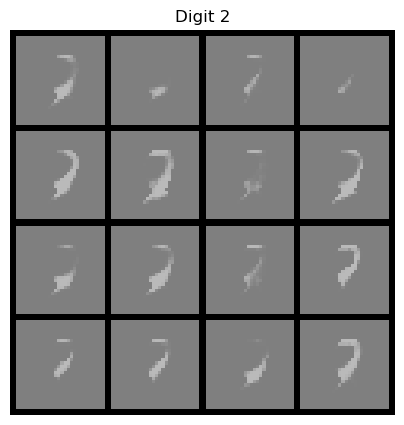

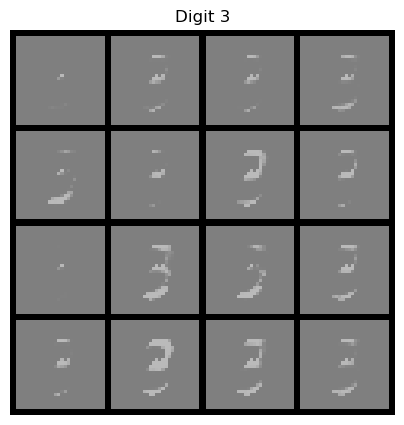

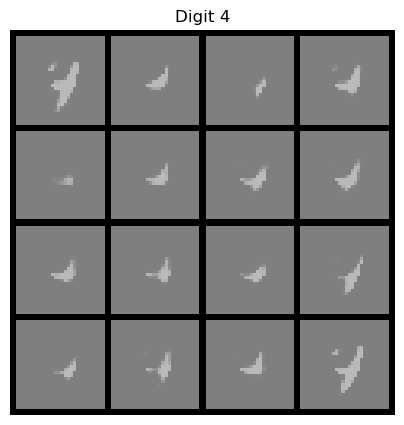

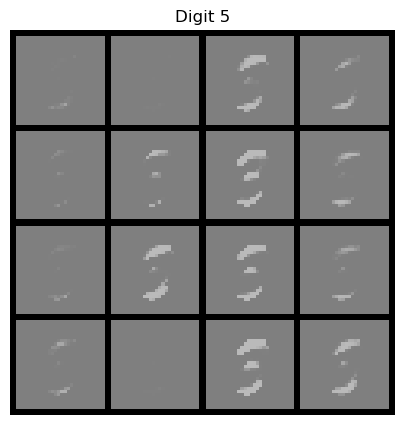

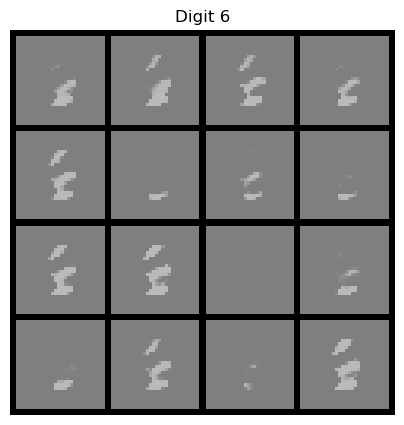

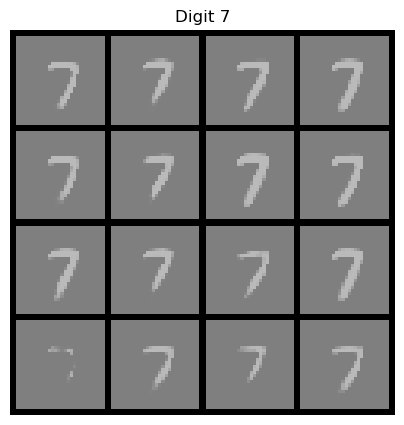

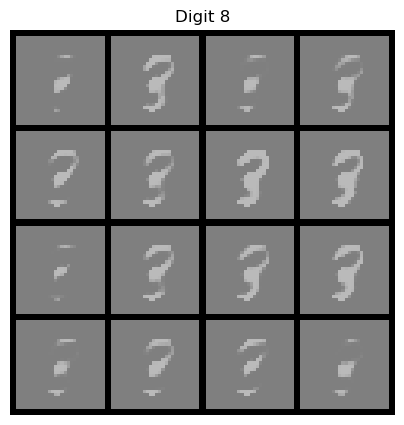

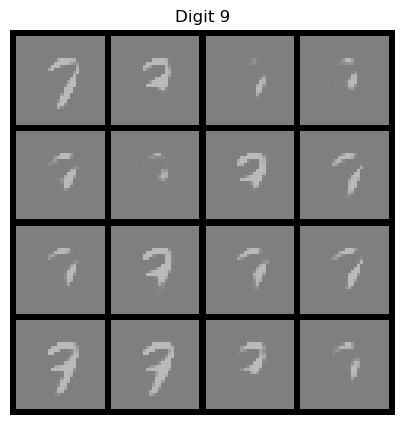

In [47]:
for d in range(10):
    samples = generate_cvae_samples(model, digit=d, device=device)
    show_images(samples, title=f"Digit {d}")


# VQ-VAE 

Let’s break down **VQ-VAE (Vector Quantized Variational Autoencoder)** step by step in **simple terms** with examples and then implement a basic version.  

---

## 🔸 What is VQ-VAE?

**VQ-VAE** is a type of **autoencoder** that learns to represent inputs using a **discrete set of vectors (codebook)** instead of continuous latent variables like in traditional VAE.

- Instead of sampling from a Gaussian distribution (like VAE), VQ-VAE uses **vector quantization** to pick the closest vector from a set (a codebook).
- The latent space is **discrete**, not continuous.
- This is especially useful in **image/audio generation** or **speech synthesis** where discrete representations work better.

---

## 🔸 What is Vector Quantization?

**Vector Quantization (VQ)** is like a **compression technique**:
- You have a set of fixed vectors (a codebook).
- Given an input vector (from encoder), you find the **nearest vector** in the codebook.
- You replace the input vector with that closest one.

**Example:**
Imagine your encoder outputs a vector `[2.1, 3.7]`, and your codebook has vectors:
```
[[2.0, 3.5], [5.0, 6.0], [0.0, 0.0]]
```
Then you pick `[2.0, 3.5]` as it is the closest. That’s quantization.

---

## 🔸 Why use discrete latent representations?

- Discrete representations are closer to how **language**, **audio**, and even **human perception** work (e.g., phonemes, words).
- Easier to model with tools like **transformers**.
- Makes downstream tasks like classification or generation more **efficient and interpretable**.

---

## 🔸 VQ-VAE vs VAE (Short Summary):

| Aspect         | VAE                          | VQ-VAE                       |
|----------------|------------------------------|------------------------------|
| Latent Space   | Continuous                   | Discrete (quantized)         |
| Sampling       | Gaussian                     | Vector from codebook         |
| Use Case       | Reconstruction + Generation  | Discrete data (speech, text) |
| Complexity     | Lower                        | Higher (due to quantization) |

---

## 🔸 VQ-VAE Architecture (Simple Overview):

1. **Encoder** → Compresses input image/audio into latent space.
2. **Quantizer** → Replace each latent vector with nearest vector from codebook.
3. **Decoder** → Reconstructs the original input from quantized latent.

---

## 🔸 VQ-VAE Implementation in PyTorch (Basic)

Let’s implement VQ-VAE using MNIST images (28x28 grayscale).

### Step 1: Vector Quantizer Module

In [57]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ==========================
# Dataset and DataLoader
# ==========================
transform = transforms.ToTensor()
train_data = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)



# ==========================
# Vector Quantizer
# ==========================
class VectorQuantizer(nn.Module):
    def __init__(self, num_embeddings, embedding_dim):
        super(VectorQuantizer, self).__init__()
        self.embedding_dim = embedding_dim
        self.num_embeddings = num_embeddings

        self.embedding = nn.Embedding(num_embeddings, embedding_dim)
        self.embedding.weight.data.uniform_(-1 / num_embeddings, 1 / num_embeddings)

    def forward(self, z):
        # z: (B, C, H, W) → (B*H*W, C)
        z_perm = z.permute(0, 2, 3, 1).contiguous()
        flat_z = z_perm.view(-1, self.embedding_dim)

        # Compute distances
        dist = (
            flat_z.pow(2).sum(1, keepdim=True)
            - 2 * flat_z @ self.embedding.weight.t()
            + self.embedding.weight.pow(2).sum(1)
        )

        indices = torch.argmin(dist, dim=1).unsqueeze(1)
        quantized = self.embedding(indices).view(z_perm.shape)

        # Losses
        commitment_loss = F.mse_loss(quantized.detach(), z_perm)
        embedding_loss = F.mse_loss(quantized, z_perm.detach())

        # Straight-through estimator
        quantized = z_perm + (quantized - z_perm).detach()
        quantized = quantized.permute(0, 3, 1, 2).contiguous()  # (B, C, H, W)

        return quantized, commitment_loss, embedding_loss

### Step 2: VQ-VAE Model

In [58]:
# ==========================
# VQ-VAE Model
# ==========================
class VQVAE(nn.Module):
    def __init__(self, embedding_dim=64, num_embeddings=512):
        super(VQVAE, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 32, 4, 2, 1),  # 28x28 → 14x14
            nn.ReLU(),
            nn.Conv2d(32, embedding_dim, 4, 2, 1),  # 14x14 → 7x7
        )

        self.vq = VectorQuantizer(num_embeddings, embedding_dim)

        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(embedding_dim, 32, 4, 2, 1),  # 7x7 → 14x14
            nn.ReLU(),
            nn.ConvTranspose2d(32, 1, 4, 2, 1),  # 14x14 → 28x28
            nn.Sigmoid()
        )

    def forward(self, x):
        z_e = self.encoder(x)
        z_q, commitment_loss, embedding_loss = self.vq(z_e)
        x_recon = self.decoder(z_q)
        return x_recon, commitment_loss, embedding_loss


### Step 3: Loss Function

In [59]:
# ==========================
# Loss Function
# ==========================
def vqvae_loss(x_recon, x, commitment_loss, embedding_loss, beta=0.25):
    recon_loss = F.mse_loss(x_recon, x)
    total_loss = recon_loss + commitment_loss + beta * embedding_loss
    return total_loss, recon_loss, commitment_loss, embedding_loss

### Step 4: Training (Sketch)

# from torchinfo import summary
summary(model,input_size=(1, 1, 28, 28))

In [60]:
# ==========================
# Training
# ==========================
model = VQVAE().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

epochs = 10
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for images, _ in train_loader:
        images = images.to(device)

        optimizer.zero_grad()
        x_recon, commit_loss, embed_loss = model(images)
        loss, recon_loss, c_loss, e_loss = vqvae_loss(x_recon, images, commit_loss, embed_loss)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {total_loss / len(train_loader):.4f}")


Epoch 1, Loss: 0.0511
Epoch 2, Loss: 0.0090
Epoch 3, Loss: 0.0081
Epoch 4, Loss: 0.0076
Epoch 5, Loss: 0.0075
Epoch 6, Loss: 0.0074
Epoch 7, Loss: 0.0072
Epoch 8, Loss: 0.0071
Epoch 9, Loss: 0.0070
Epoch 10, Loss: 0.0069


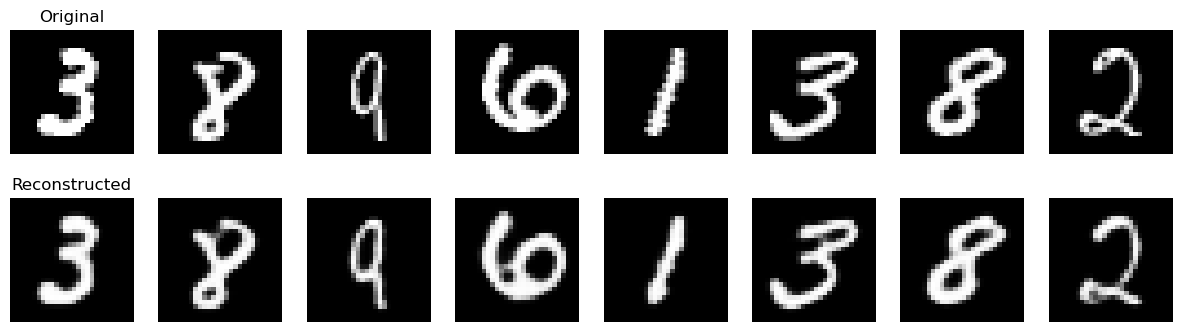

In [62]:
# ==========================
# Visualize Reconstruction
# ==========================
model.eval()
with torch.no_grad():
    sample = next(iter(train_loader))[0][:8].to(device)
    recon, _, _ = model(sample)

    fig, axs = plt.subplots(2, 8, figsize=(15, 4))
    for i in range(8):
        axs[0, i].imshow(sample[i].cpu().squeeze(), cmap='gray')
        axs[0, i].axis('off')
        axs[1, i].imshow(recon[i].cpu().squeeze(), cmap='gray')
        axs[1, i].axis('off')
    axs[0, 0].set_title("Original")
    axs[1, 0].set_title("Reconstructed")
    plt.show()

## 🔸 Summary

| Concept                     | Meaning                                                                 |
|----------------------------|-------------------------------------------------------------------------|
| Vector Quantization         | Replace with nearest vector from a codebook                            |
| Discrete Latents            | Instead of continuous z, use one of k fixed vectors                    |
| Use Case                    | Image/audio generation, speech synthesis, anomaly detection             |
| Key Benefit                 | Discrete representations are more interpretable and compressible       |
| VQ-VAE Challenge            | Hard to train, needs commitment and embedding loss                     |

---

Would you like:
- Visualizations of reconstructed vs input images?
- Use of VQ-VAE for **anomaly detection or audio data**?

Let me know and I’ll walk you through it too.

Here's a step-by-step breakdown of your `VectorQuantizer` class with explanation for each part:

---

### **1. Initialization**
```python
class VectorQuantizer(nn.Module):
    def __init__(self, num_embeddings, embedding_dim):
        super(VectorQuantizer, self).__init__()
        self.embedding_dim = embedding_dim
        self.num_embeddings = num_embeddings

        self.embedding = nn.Embedding(num_embeddings, embedding_dim)
        self.embedding.weight.data.uniform_(-1 / num_embeddings, 1 / num_embeddings)
```

- `num_embeddings`: Total number of vectors (codebook size).
- `embedding_dim`: The size of each embedding vector (latent dimensionality).
- `self.embedding`: This is the learnable codebook. It holds `num_embeddings` vectors of length `embedding_dim`.
- The `.uniform_()` call initializes weights in a uniform distribution.

---

### **2. Input permutation and flattening**
```python
# z: (B, C, H, W) → (B*H*W, C)
z_perm = z.permute(0, 2, 3, 1).contiguous()  # (B, H, W, C)
flat_z = z_perm.view(-1, self.embedding_dim)  # (B*H*W, C)
```

- `z` is the encoded feature map from the encoder with shape `(batch, channels, height, width)`.
- `permute(0, 2, 3, 1)` changes shape from `(B, C, H, W)` → `(B, H, W, C)` to prepare for vector quantization per spatial location.
- `.contiguous()` ensures memory layout is safe for `.view`.
- `.view(-1, self.embedding_dim)` flattens all spatial locations into one big list of vectors (each of size `embedding_dim`).

---

### **3. Distance calculation (between z and all embeddings)**
```python
dist = (
    flat_z.pow(2).sum(1, keepdim=True)              # ||z||^2
    - 2 * flat_z @ self.embedding.weight.t()        # -2 * z * e^T
    + self.embedding.weight.pow(2).sum(1)           # ||e||^2
)
```

This computes the **squared Euclidean distance** between each vector in `flat_z` and every embedding vector in the codebook.

Let’s call:
- `z` = latent vector
- `e` = codebook embedding

Distance formula (broadcasted):  

$$\| z - e \|^2 = \| z \|^2 - 2z \cdot e + \| e \|^2$$

---

### **4. Nearest embedding selection**
```python
indices = torch.argmin(dist, dim=1).unsqueeze(1)
quantized = self.embedding(indices).view(z_perm.shape)
```

- For each `z`, you select the embedding with the **minimum distance**.
- `indices` is of shape `(B*H*W, 1)` → contains the index of the nearest codebook vector.
- `self.embedding(indices)` retrieves the closest embedding.
- `.view(z_perm.shape)` reshapes the quantized output back to `(B, H, W, C)`.

---

### **5. Loss calculation**
```python
commitment_loss = F.mse_loss(quantized.detach(), z_perm)
embedding_loss = F.mse_loss(quantized, z_perm.detach())
```

- **Commitment loss** encourages the encoder output (`z_perm`) to stay close to the quantized embedding (but no gradient to codebook).
- **Embedding loss** pulls the embedding vector toward the encoder output (no gradient to encoder).
- Both use `detach()` to stop backprop through the corresponding part.

---

### **6. Straight-through estimator**
```python
quantized = z_perm + (quantized - z_perm).detach()
```

- The `quantized` tensor is used for reconstruction.
- This trick allows the gradients to pass through `z_perm` instead of `quantized`, even though `quantized` is discrete (non-differentiable).

---

### **7. Re-permute quantized to (B, C, H, W)**
```python
quantized = quantized.permute(0, 3, 1, 2).contiguous()
```

- Shape goes from `(B, H, W, C)` → back to `(B, C, H, W)` so the decoder can process it normally.

---

### **8. Return values**
```python
return quantized, commitment_loss, embedding_loss
```

You return:
- `quantized`: the quantized tensor to feed into the decoder.
- `commitment_loss`: used to update encoder.
- `embedding_loss`: used to update codebook.

---


In [113]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import os
from torchinfo import summary
import csv

image_path = "C:/Users/Raunak Gola/Ultimate notes/plant-pathology-2020-fgvc7/Train_img"
label_file_path = "C:/Users/Raunak Gola/Ultimate notes/plant-pathology-2020-fgvc7/train.csv"
# Dataset Class

class HistopathologyDataset(Dataset):
    def __init__(self, image_dir, label_file, transform=None):
        self.image_dir = image_dir
        self.label_file = label_file
        self.transform = transform
        self.image_names = os.listdir(image_dir)
        self.labels = self.load_labels(label_file)

    def load_labels(self, label_file):
        labels = {}
        with open(label_file, 'r') as file:
            reader = csv.DictReader(file)
            for row in reader:
                image_id = row['image_id']
                # Get the class with label 1
                for idx, class_name in enumerate(['healthy', 'multiple_diseases', 'rust', 'scab']):
                    if int(row[class_name]) == 1:
                        labels[image_id + ".jpg"] = idx  # Assuming image filenames are like 'Train_0.jpg'
                        break
        return labels

    def __len__(self):
        return len(self.image_names)

    def __getitem__(self, idx):
        image_name = self.image_names[idx]
        image_path = os.path.join(self.image_dir, image_name)
        image = Image.open(image_path).convert('RGB')
        label = self.labels[image_name]
        if self.transform:
            image = self.transform(image)
        return image, label

# Data Transformations
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

# Initialize Dataset and DataLoader
dataset = HistopathologyDataset(image_dir=image_path, label_file=label_file_path, transform=transform)
train_loader = DataLoader(dataset, batch_size=64, shuffle=True)

# Define VQ-VAE Model
class VQVAE(nn.Module):
    def __init__(self, embedding_dim=64, num_embeddings=512, num_labels=4):
        super(VQVAE, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 32, 4, 2, 1),  # (128x128) → (64x64)
            nn.ReLU(),
            nn.Conv2d(32, embedding_dim, 4, 2, 1),  # (64x64) → (32x32)
        )
        self.vq = VectorQuantizer(num_embeddings, embedding_dim)
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(embedding_dim, 32, 4, 2, 1),  # (32x32) → (64x64)
            nn.ReLU(),
            nn.ConvTranspose2d(32, 3, 4, 2, 1),  # (64x64) → (128x128)
        )
        self.label_embed = nn.Embedding(num_labels, embedding_dim)
        self.fc = nn.Linear(embedding_dim, num_labels)

    def forward(self, x, labels):
        z = self.encoder(x)
        z_q, commitment_loss, embedding_loss = self.vq(z)
        x_recon = self.decoder(z_q)
        label_embedding = self.label_embed(labels)
        label_output = self.fc(label_embedding)
        return x_recon, label_output, z, z_q, commitment_loss, embedding_loss

# Vector Quantizer
class VectorQuantizer(nn.Module):
    def __init__(self, num_embeddings, embedding_dim):
        super(VectorQuantizer, self).__init__()
        self.embedding_dim = embedding_dim
        self.num_embeddings = num_embeddings
        self.embedding = nn.Embedding(num_embeddings, embedding_dim)
        self.embedding.weight.data.uniform_(-1 / num_embeddings, 1 / num_embeddings)

    def forward(self, z):
        z_perm = z.permute(0, 2, 3, 1).contiguous()
        flat_z = z_perm.view(-1, self.embedding_dim)
        dist = (
            flat_z.pow(2).sum(1, keepdim=True)
            - 2 * flat_z @ self.embedding.weight.t()
            + self.embedding.weight.pow(2).sum(1)
        )
        indices = torch.argmin(dist, dim=1).unsqueeze(1)
        quantized = self.embedding(indices).view(z_perm.shape)
        commitment_loss = F.mse_loss(quantized.detach(), z_perm)
        embedding_loss = F.mse_loss(quantized, z_perm.detach())
        quantized = z_perm + (quantized - z_perm).detach()
        quantized = quantized.permute(0, 3, 1, 2).contiguous()
        return quantized, commitment_loss, embedding_loss

# Loss Function
# def vqvae_loss(x_recon, x, z_q, z_e):
#     recon_loss = F.mse_loss(x_recon, x)
#     commitment_loss = F.mse_loss(z_q.detach(), z_e)
#     embedding_loss = F.mse_loss(z_q, z_e.detach())
#     return recon_loss + 2*commitment_loss + 2*embedding_loss
def vqvae_loss(x_recon, x, z_q, z_e, beta=0.25):
    recon_loss = F.mse_loss(x_recon, x)
    commitment_loss = F.mse_loss(z_e, z_q.detach())
    embedding_loss = F.mse_loss(z_q, z_e.detach())
    return recon_loss + embedding_loss + beta * commitment_loss


# Initialize Model, Optimizer, and Loss Function
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = VQVAE().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# Dummy inputs for summary
dummy_images = torch.randn(1, 3, 128, 128).to(device)  # batch_size=1
dummy_labels = torch.randint(0, 4, (1,)).to(device)    # 4 classes


# Temporary wrapper for summary
class VQVAE_SummaryWrapper(nn.Module):
    def __init__(self, model):
        super().__init__()
        self.model = model

    def forward(self, x, labels):
        x_recon, _, _, _, _, _ = self.model(x, labels)
        return x_recon

# Use this for summary only
summary_model = VQVAE_SummaryWrapper(model)
print(summary(summary_model, input_data=(dummy_images, dummy_labels)))

# Training Loop
epochs = 10
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)  # ✅ Correctly move to device

        optimizer.zero_grad()

        # Forward pass
        recon_images, label_output, _, _, _, _ = model(images, labels)

        # Reconstruction loss
        recon_loss = F.mse_loss(recon_images, images)

        # Classification loss
        class_loss = F.cross_entropy(label_output, labels)

        # Total loss
        total = recon_loss + class_loss

        total.backward()
        optimizer.step()

        total_loss += total.item()

    avg_loss = total_loss / len(train_loader)
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}")



Layer (type:depth-idx)                   Output Shape              Param #
VQVAE_SummaryWrapper                     [1, 3, 128, 128]          --
├─VQVAE: 1-1                             [1, 3, 128, 128]          --
│    └─Sequential: 2-1                   [1, 64, 32, 32]           --
│    │    └─Conv2d: 3-1                  [1, 32, 64, 64]           1,568
│    │    └─ReLU: 3-2                    [1, 32, 64, 64]           --
│    │    └─Conv2d: 3-3                  [1, 64, 32, 32]           32,832
│    └─VectorQuantizer: 2-2              [1, 64, 32, 32]           --
│    │    └─Embedding: 3-4               [1024, 1, 64]             32,768
│    └─Sequential: 2-3                   [1, 3, 128, 128]          --
│    │    └─ConvTranspose2d: 3-5         [1, 32, 64, 64]           32,800
│    │    └─ReLU: 3-6                    [1, 32, 64, 64]           --
│    │    └─ConvTranspose2d: 3-7         [1, 3, 128, 128]          1,539
│    └─Embedding: 2-4                    [1, 64]                   

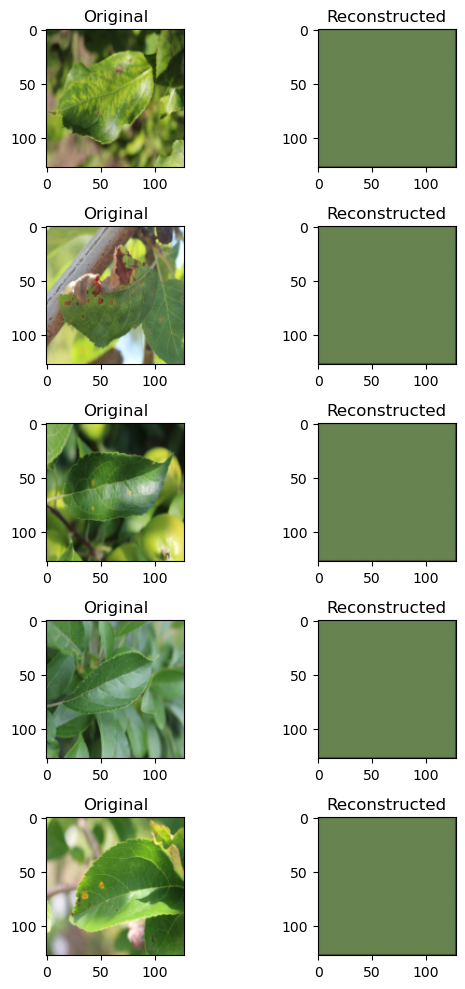

In [114]:
import matplotlib.pyplot as plt

def show_reconstruction(model, dataset, device, num_images=5):
    model.eval()
    fig, axs = plt.subplots(num_images, 2, figsize=(6, 2 * num_images))

    for i in range(num_images):
        image, label = dataset[i]
        image = image.unsqueeze(0).to(device)
        label = torch.tensor([label]).to(device)

        with torch.no_grad():
            recon_image, _, _, _, _, _ = model(image, label)

        axs[i, 0].imshow(image.squeeze().permute(1, 2, 0).cpu())
        axs[i, 0].set_title("Original")
        # axs[i, 0].axis('off')

        axs[i, 1].imshow(recon_image.squeeze().permute(1, 2, 0).cpu())
        axs[i, 1].set_title("Reconstructed")
        # axs[i, 1].axis('off')

    plt.tight_layout()
    plt.show()

# Call this function after training
show_reconstruction(model, dataset, device)


In [118]:
codebook = model.vq.embedding.weight.data.cpu()


In [121]:
codebook.shape

torch.Size([512, 64])

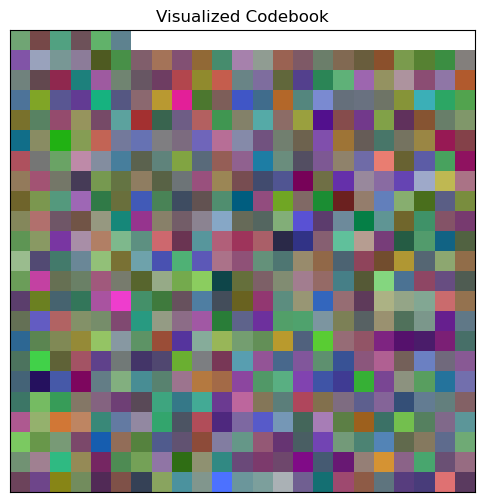

In [119]:
import matplotlib.pyplot as plt
import torch
from sklearn.decomposition import PCA

# If embedding_dim > 3, reduce to 3D using PCA
pca = PCA(n_components=3)
codebook_reduced = pca.fit_transform(codebook.numpy())  # shape: (num_embeddings, 3)

# Normalize to [0,1] for image display
codebook_img = (codebook_reduced - codebook_reduced.min()) / (codebook_reduced.max() - codebook_reduced.min())

# Plot each vector as a color
num_embeddings = codebook_img.shape[0]
side = int(num_embeddings**0.5) + 1  # try to make square-ish grid

fig, ax = plt.subplots(figsize=(6, 6))
for i in range(num_embeddings):
    color = codebook_img[i]
    row, col = divmod(i, side)
    rect = plt.Rectangle([col, row], 1, 1, facecolor=color)
    ax.add_patch(rect)

ax.set_xlim(0, side)
ax.set_ylim(0, side)
ax.set_xticks([])
ax.set_yticks([])
plt.title("Visualized Codebook")
plt.show()


In [124]:
codebook_reduced.shape

(512, 3)

Sure. Let's break both of these down clearly and simply.

---

### **1. Why use *discrete* vs *continuous* latent spaces?**

#### **Continuous Latent Spaces (used in VAEs)**

- **Definition**: Latent space is a continuous range of numbers (like floating point values).
- **Example**: Imagine trying to describe a person’s face. You might use continuous numbers to represent features like nose size, eye width, etc.

#### **Discrete Latent Spaces (used in VQ-VAE)**

- **Definition**: Latent space is made of a fixed set of *symbols* (like a codebook of 512 embeddings).
- **Example**: Imagine instead of describing a person’s face with floating numbers, you choose from a fixed set of “face types” for each part (like hairstyle: 1 of 100 styles, eye shape: 1 of 50 types, etc.).

---

#### **Why choose discrete?**

| Feature                       | Continuous (VAE)                         | Discrete (VQ-VAE)                            |
|------------------------------|------------------------------------------|----------------------------------------------|
| **Control & Interpretation** | Hard to control or interpret             | Easier to assign meaning to each code        |
| **Good for Generation?**     | Yes, but harder to constrain             | Yes, and more natural for symbolic tasks     |
| **Useful for language/audio?** | Less so                                 | Yes, great for speech, language, image tokens |
| **Example Use Case**         | Face generation                         | Speech synthesis, video compression          |

> **Analogy**: Continuous is like painting with infinite shades. Discrete is like painting with a fixed set of LEGO blocks.

---

### **2. How can VQ-VAE be misused?**

VQ-VAE is powerful, but there are ways it can be misused or misunderstood.

---

#### **Misuse 1: Using it on the wrong type of data**

- **Example**: Applying VQ-VAE to data that doesn’t have repetitive patterns (like random noise).
- **Problem**: The codebook becomes useless because there’s nothing to “cluster”.

---

#### **Misuse 2: Too large or too small codebook**

- **Example**: Using a 10,000-sized codebook for simple MNIST digits.
- **Problem**: The model memorizes input instead of learning real structure. You lose generalization.

---

#### **Misuse 3: Ignoring commitment loss**

- **Explanation**: VQ-VAE includes a *commitment loss* to make sure the encoder sticks to using the codebook entries properly.
- **If you skip or mis-tune this**, your encoder might ignore the codebook or keep jumping between entries, leading to unstable training.

---

#### **Misuse 4: No quantization-aware decoder**

- If the decoder is too strong (like a powerful CNN), it can just "ignore" the quantized input and reconstruct the image from scratch.
- **Result**: Codebook doesn’t get trained well. You get good reconstructions, but the latent space is meaningless.

---

### ✅ Summary (In Simple Terms):

| Point                          | Explanation |
|-------------------------------|-------------|
| **Discrete vs Continuous**    | Discrete helps with control and symbolic data. Continuous gives flexibility but less structure. |
| **Misuse Examples**           | Wrong dataset, bad codebook size, ignoring losses, too powerful decoder. |

Let me know if you want a diagram or simple code snippets for any of these points.

Let's break down **PSNR (Peak Signal-to-Noise Ratio)** in simple terms with an example and the formula.

---

## ✅ What is PSNR?

**PSNR** measures the **quality of reconstructed or compressed images** by comparing them to the original.

Think of it like this:

> "How close is the reconstructed image to the original one?"

A **higher PSNR value** means better quality, i.e., the image is **less distorted**.

---

## ✅ Use Case

Imagine you trained an **autoencoder**. You give it an image of the digit **"7"**, and it reconstructs something that **looks like "7"**.

To **measure how good that reconstruction is**, we use PSNR.

---

## ✅ Formula

PSNR is calculated using **MSE (Mean Squared Error)** first.

### Step 1: Compute MSE

$$\text{MSE} = \frac{1}{mn} \sum_{i=0}^{m-1} \sum_{j=0}^{n-1} \left[ I(i,j) - K(i,j) \right]^2$$

Where:
-  $I(i,j)$ is the pixel value of the original imag
- $K(i,j)$ is the pixel value of the reconstructed image
- $m \times n$ is the image size (e.g., $28 \times 28$ for MNIST)e
e}T)T)T)Size}

### Step 2: Comp\begin{equation}
PSNR = 10 \cdot \log_{10} \left( \frac{MAX_I^2}{MSE} \right)
\end{equation}
n}\right)
\]

Where:
- \( MAX_I \) is the maximum possible pixel value (255 for 8-bit images, 1.0 for normalized)
- MSE ized to [0, 1]

---



## ✅ Simple Example

Let’s say we have a small 2×2 image:

### Original image (pixel values 0-255):

```
[[100, 150],
 [200, 250]]
```

### Reconstructed image:

```
[[102, 148],
 [198, 251]]
```

### Step 1: MSE


$$\text{MSE} = \frac{(100 - 102)^2 + (150 - 148)^2 + (200 - 198)^2 + (250 - 251)^2}{4} = \frac{4 + 4 + 4 + 1}{4} = \frac{13}{4} = 3.25$$


### Step 2: PSNR (for 8-bit image, max = 255)


PSNR = 10 \cdot \log_{10} \left( \frac{255^2}{3.25} \right)
= 10 \cdot \log_{10} \left( \frac{65025}{3.25} \right)
= 10 \cdot \log_{10}(20007.69) \approx 10 \cdot 4.301 = 43.01\,\text{dB}


---

## ✅ PSNR Values Range

| PSNR (dB) | Quality          |
|-----------|------------------|
| > 40      | Excellent        |
| 30–40     | Good             |
| 20–30     | Poor             |
| < 20      | Very Poor        |

---

## ✅ In Practice (PyTorch Example)

```python
import torch
import torch.nn.functional as F

def compute_psnr(img1, img2):
    mse = F.mse_loss(img1, img2)
    if mse == 0:
        return float('inf')
    return 20 * torch.log10(1.0 / torch.sqrt(mse))
```

> Use this if your images are normalized to [0, 1]

---

Let me know if you want a visualization or to implement this for your VQ-VAE results.

Sure. Let’s break down **FID (Fréchet Inception Distance)** in simple terms with an example and the formula in detail.

---

## ✅ What is FID?

**FID** is a metric used to evaluate **image quality** generated by models like GANs, VAEs, or VQ-VAEs.

In simple terms:

> **FID compares the distribution of generated images to the distribution of real images.**  
> The **lower the FID score**, the **closer your generated images are to real ones** — meaning better quality.

---

## ✅ Why not use just PSNR or SSIM?

Metrics like PSNR/SSIM compare pixel-wise differences.  
But sometimes a generated image **looks good** even if pixels are a bit different.

**FID goes deeper** — it compares **features** (what the image represents) instead of raw pixels.  
It captures **semantic similarity**, which is more aligned with human judgment.

---

## ✅ How does FID work?

1. Take **real images** and **generated images**.
2. Pass them through a **pre-trained Inception v3 network** (a powerful image classifier).
3. Extract the **activations** from one of the deeper layers (feature vectors).
4. Model both sets of activations as **multivariate Gaussians**:
   - Real images → mean \( \mu_r \), covariance \( \Sigma_r \)
   - Generated images → mean \( \mu_g \), covariance \( \Sigma_g \)
5. Compute the Fréchet distance between these two Gaussians.

---

## ✅ FID Formula

\[
FID = \| \mu_r - \mu_g \|^2 + \text{Tr}(\Sigma_r + \Sigma_g - 2(\Sigma_r \Sigma_g)^{\frac{1}{2}})
\]

Where:
- \( \mu_r, \mu_g \): means of real and generated image features
- \( \Sigma_r, \Sigma_g \): covariance matrices of real and generated image features
- \( \text{Tr} \): trace of a matrix (sum of the diagonal elements)

---

## ✅ Simple Example (Conceptual)

Let’s say we have:

- Real image features:  
  \( \mu_r = [0.5, 0.4], \Sigma_r = [[0.1, 0], [0, 0.1]] \)

- Generated image features:  
  \( \mu_g = [0.6, 0.45], \Sigma_g = [[0.09, 0], [0, 0.09]] \)

Step 1: Mean difference  
\[
\| \mu_r - \mu_g \|^2 = (0.5 - 0.6)^2 + (0.4 - 0.45)^2 = 0.01 + 0.0025 = 0.0125
\]

Step 2: Covariance trace  
\[
\text{Tr}(\Sigma_r + \Sigma_g - 2(\Sigma_r \Sigma_g)^{1/2})  
\approx 0.1 + 0.09 - 2 \cdot \sqrt{0.1 \cdot 0.09}  
= 0.19 - 2(0.0948) = 0.0004
\]

Total FID ≈ 0.0125 + 0.0004 = **0.0129**

> A very low FID → means generated images are very similar to real ones.

---

## ✅ FID Score Range

| FID Score | Interpretation        |
|-----------|------------------------|
| 0         | Perfect match (ideal) |
| < 10      | Excellent quality      |
| 10–50     | Good/Fair quality      |
| > 50      | Poor quality           |

---

## ✅ How to Calculate FID in Code

Use libraries like `torchmetrics`, `pytorch-fid`, or TensorFlow's FID implementation.

**Example with `torchmetrics`:**

```python
from torchmetrics.image.fid import FrechetInceptionDistance

fid = FrechetInceptionDistance(feature=2048)

# Add real and fake images (should be in [0, 255] range, shape: [B, 3, H, W])
fid.update(real_images, real=True)
fid.update(generated_images, real=False)

# Compute FID
score = fid.compute()
print(f"FID Score: {score}")
```

---

## ✅ Summary

- **PSNR**: compares pixel differences (low-level)
- **FID**: compares semantic similarity using feature vectors (high-level)
- **Lower FID = better generated images**


# The Final ShowDown

In [61]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

transform = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.ToTensor(),
    # transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)


# ✅ PSNR (Peak Signal-to-Noise Ratio)

In [2]:
import torch.nn.functional as F

def compute_psnr(reconstructed, original):
    mse = F.mse_loss(reconstructed, original)
    if mse == 0:
        return 100
    return 20 * torch.log10(1.0 / torch.sqrt(mse))


# ✅ SSIM

In [68]:
import torch
import torch.nn.functional as F
from torch import nn
import math

def ssim(img1, img2, window_size=11, C1=0.01**2, C2=0.03**2):
    # Assumes image shape (N, 1, H, W)
    device = img1.device
    channel = img1.size(1)

    def create_window(window_size, channel):
        gauss = torch.tensor([
            math.exp(-(x - window_size//2)**2 / float(2*1.5**2)) 
            for x in range(window_size)
        ])
        gauss = gauss / gauss.sum()
        _1D_window = gauss.unsqueeze(1)
        _2D_window = _1D_window @ _1D_window.T
        window = _2D_window.expand(channel, 1, window_size, window_size).contiguous()
        return window

    window = create_window(window_size, channel).to(device)

    mu1 = F.conv2d(img1, window, padding=window_size//2, groups=channel)
    mu2 = F.conv2d(img2, window, padding=window_size//2, groups=channel)

    mu1_sq = mu1.pow(2)
    mu2_sq = mu2.pow(2)
    mu1_mu2 = mu1 * mu2

    sigma1_sq = F.conv2d(img1 * img1, window, padding=window_size//2, groups=channel) - mu1_sq
    sigma2_sq = F.conv2d(img2 * img2, window, padding=window_size//2, groups=channel) - mu2_sq
    sigma12 = F.conv2d(img1 * img2, window, padding=window_size//2, groups=channel) - mu1_mu2

    ssim_map = ((2 * mu1_mu2 + C1) * (2 * sigma12 + C2)) / \
               ((mu1_sq + mu2_sq + C1) * (sigma1_sq + sigma2_sq + C2))

    return ssim_map.mean().item()


In [ ]:
ssim_score = ssim(reconstructed_images, real_images)
print(f"SSIM: {ssim_score}")


In [6]:
import torch
import torchvision
import numpy as np
from scipy.linalg import sqrtm

def get_inception_features(images, model, device):
    images = F.interpolate(images, size=(299, 299), mode='bilinear', align_corners=False)
    features = model(images)[0].detach().cpu().numpy()
    return features

def calculate_fid(real_images, fake_images, device='cpu'):
    inception = torchvision.models.inception_v3(pretrained=True, transform_input=False).to(device)
    inception.eval()

    with torch.no_grad():
        real_feat = get_inception_features(real_images.to(device), inception, device)
        fake_feat = get_inception_features(fake_images.to(device), inception, device)

    mu1, sigma1 = real_feat.mean(axis=0), np.cov(real_feat, rowvar=False)
    mu2, sigma2 = fake_feat.mean(axis=0), np.cov(fake_feat, rowvar=False)

    diff = mu1 - mu2
    covmean = sqrtm(sigma1.dot(sigma2))

    # Avoid numerical errors
    if np.iscomplexobj(covmean):
        covmean = covmean.real

    fid = diff.dot(diff) + np.trace(sigma1 + sigma2 - 2 * covmean)
    return fid


In [70]:
from torchvision.models import inception_v3, Inception_V3_Weights
from torch.nn import AdaptiveAvgPool2d

def get_inception_features(images, model, device):
    images = F.interpolate(images, size=(299, 299), mode='bilinear', align_corners=False)
    with torch.no_grad():
        features = model(images)
        # Global average pooling to get 2048-dim vectors
        features = AdaptiveAvgPool2d((1, 1))(features)
        features = features.view(features.size(0), -1)
    return features.cpu().numpy()

def calculate_fid(real_images, fake_images, device='cpu'):
    weights = Inception_V3_Weights.IMAGENET1K_V1
    inception = inception_v3(weights=weights, transform_input=False).to(device)
    inception.eval()

    # Remove classification head
    inception.fc = nn.Identity()

    real_feat = get_inception_features(real_images.to(device), inception, device)
    fake_feat = get_inception_features(fake_images.to(device), inception, device)

    mu1, sigma1 = real_feat.mean(axis=0), np.cov(real_feat, rowvar=False)
    mu2, sigma2 = fake_feat.mean(axis=0), np.cov(fake_feat, rowvar=False)

    diff = mu1 - mu2
    covmean = sqrtm(sigma1 @ sigma2)

    if np.iscomplexobj(covmean):
        covmean = covmean.real

    fid = diff @ diff + np.trace(sigma1 + sigma2 - 2 * covmean)
    return fid


In [ ]:
fid_score = calculate_fid(real_images[:100], reconstructed_images[:100], device='cuda' or 'cpu')
print(f"FID: {fid_score}")


In [62]:
import torch.nn as nn

class AE(nn.Module):
    def __init__(self):
        super(AE, self).__init__()
        self.encoder = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28 * 28, 128),
            nn.ReLU(True),
            nn.Linear(128, 64),
            nn.ReLU(True),
        )
        self.decoder = nn.Sequential(
            nn.Linear(64, 128),
            nn.ReLU(True),
            nn.Linear(128, 28 * 28),
        )

    def forward(self, x):
        z = self.encoder(x)
        x_recon = self.decoder(z)
        return x_recon


In [22]:
import torch
import torch.nn as nn

class VAE(nn.Module):
    def __init__(self):
        super(VAE, self).__init__()
        self.encoder = nn.Sequential(
            nn.Flatten(),
            nn.Linear(784, 400),
            nn.ReLU()
        )
        self.fc_mu = nn.Linear(400, 20)
        self.fc_logvar = nn.Linear(400, 20)

        self.decoder = nn.Sequential(
            nn.Linear(20, 400),
            nn.ReLU(),
            nn.Linear(400, 784),
            nn.Unflatten(1, (1, 28, 28))
        )

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def forward(self, x):
        h = self.encoder(x)
        mu, logvar = self.fc_mu(h), self.fc_logvar(h)
        z = self.reparameterize(mu, logvar)
        x_recon = self.decoder(z)
        return x_recon, mu, logvar


In [9]:
def vae_loss(x_recon, x, mu, logvar):
    recon_loss = nn.functional.binary_cross_entropy(x_recon, x, reduction='sum')
    kld = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return recon_loss + kld


In [21]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class VectorQuantizer(nn.Module):
    def __init__(self, num_embeddings, embedding_dim):
        super(VectorQuantizer, self).__init__()
        self.embedding_dim = embedding_dim
        self.num_embeddings = num_embeddings

        self.embedding = nn.Embedding(num_embeddings, embedding_dim)
        self.embedding.weight.data.uniform_(-1/self.num_embeddings, 1/self.num_embeddings)

    def forward(self, z):
        # Flatten z -> [B, C, H, W] to [BHW, C]
        z_flat = z.permute(0, 2, 3, 1).contiguous().view(-1, self.embedding_dim)

        # Compute distances
        dist = torch.sum(z_flat ** 2, dim=1, keepdim=True) + \
               torch.sum(self.embedding.weight ** 2, dim=1) - \
               2 * torch.matmul(z_flat, self.embedding.weight.t())

        # Get encoding indices
        encoding_indices = torch.argmin(dist, dim=1)
        quantized = self.embedding(encoding_indices).view(z.shape)
        quantized = quantized.permute(0, 3, 1, 2)

        return quantized, encoding_indices

class VQVAE(nn.Module):
    def __init__(self, num_embeddings=64, embedding_dim=32):
        super(VQVAE, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 32, 4, stride=2, padding=1),  # [B, 32, 14, 14]
            nn.ReLU(),
            nn.Conv2d(32, embedding_dim, 3, stride=1, padding=1)  # [B, D, 14, 14]
        )
        self.vq = VectorQuantizer(num_embeddings, embedding_dim)
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(embedding_dim, 32, 3, stride=1, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 1, 4, stride=2, padding=1),
        )

    def forward(self, x):
        z_e = self.encoder(x)
        z_q, _ = self.vq(z_e)
        x_recon = self.decoder(z_q)
        return x_recon, z_q, z_e


In [11]:
def vqvae_loss(x_recon, x, z_q, z_e, beta=0.25):
    recon_loss = F.mse_loss(x_recon, x)
    commitment_loss = F.mse_loss(z_e, z_q.detach())
    embedding_loss = F.mse_loss(z_q, z_e.detach())
    return recon_loss + beta * (commitment_loss + embedding_loss)


In [14]:
#Device agnostic code
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
print(device)

cpu


In [63]:
AE_model = AE().to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(AE_model.parameters(), lr=1e-03)

# Trraining Loop
for epoch in range(10):
    for data in train_loader:
        img, _ = data
        img = img.to(device)  # No need to flatten here

        # Forward pass
        output = AE_model(img)
        loss = criterion(output, img.view(img.size(0), -1))

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/10], Loss: {loss.item():.4f}')

# Testing the autoencoder
with torch.no_grad():
    for data in test_loader:
        img, _ = data
        img = img.view(img.size(0), -1).to(device)
        output = AE_model(img)
        break

Epoch [1/10], Loss: 0.0178
Epoch [2/10], Loss: 0.0149
Epoch [3/10], Loss: 0.0134
Epoch [4/10], Loss: 0.0128
Epoch [5/10], Loss: 0.0137
Epoch [6/10], Loss: 0.0129
Epoch [7/10], Loss: 0.0130
Epoch [8/10], Loss: 0.0133
Epoch [9/10], Loss: 0.0136
Epoch [10/10], Loss: 0.0130


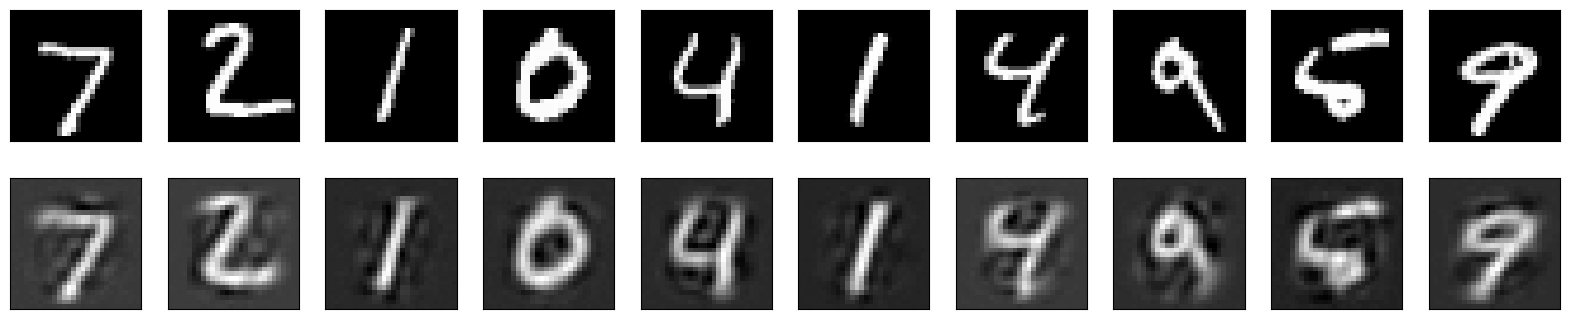

In [64]:
import matplotlib.pyplot as plt
# Plot original and reconstructed images
output = output.view(output.size(0), 1, 28, 28).cpu()
img = img.view(img.size(0), 1, 28, 28).cpu()
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(img[i].numpy().squeeze(), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(output[i].numpy().squeeze(), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# ✅ Additional Notes

- **InceptionV3 input:** It expects 3-channel images resized to 299×299. That’s why we expand 1-channel to 3 and resize using F.interpolate inside get_inception_features.

- **Normalization:** If you normalized the MNIST images to [0, 1], then the current setup works. If you normalized differently, adjust accordingly.

- **Model accuracy vs FID:** Even if MSE/PSNR seems okay, a high FID usually means the model is not learning global structure well. You may need more training epochs or a more expressive model.

In [71]:
import torch
from torchvision.utils import make_grid

# Put model in eval mode
AE_model.eval()

# Collect a batch of test images
with torch.no_grad():
    for data in test_loader:
        real_imgs, _ = data
        real_imgs = real_imgs.to(device)  # Shape: (N, 1, 28, 28)

        # Run through model
        reconstructed_imgs = AE_model(real_imgs)  # Output shape: (N, 784)
        reconstructed_imgs = reconstructed_imgs.view(-1, 1, 28, 28)

        # Done for one batch
        break

# PSNR
psnr_val = compute_psnr(reconstructed_imgs, real_imgs)
print(f"PSNR: {psnr_val:.4f} dB")

# SSIM
ssim_val = ssim(real_imgs, reconstructed_imgs)
print(f"SSIM: {ssim_val:.4f}")

# FID — Resize both real and fake images to (3, 299, 299)
real_imgs_resized = real_imgs.expand(-1, 3, -1, -1)  # MNIST: convert 1-channel to 3
reconstructed_imgs_resized = reconstructed_imgs.expand(-1, 3, -1, -1)

fid_val = calculate_fid(real_imgs_resized, reconstructed_imgs_resized, device=device)
print(f"FID: {fid_val:.4f}")


PSNR: 18.8840 dB
SSIM: 0.6597


ValueError: Input dimension should be at least 3

# Integrate VQ-VAE with Transformer for generative tasks

- Evaluate models (PSNR, FID, SSIM)
- Compare AE, VAE, VQ-VAE
- Export models with TorchScript

- Create a dashboard to compare reconstructions
- Quantitatively evaluate all models

## **Which Model Fits Your Use Case Best?**

When choosing between **Autoencoder (AE)**, **Variational Autoencoder (VAE)**, and **Vector Quantized Variational Autoencoder (VQ-VAE)**, it depends on what you're trying to achieve. Let’s break it down.

### 1️⃣ **Autoencoder (AE)**
✔ **Best for:** Data compression, noise removal, and anomaly detection  
✔ **How it works:**  
- An **encoder** compresses the input into a smaller **latent space representation**.  
- A **decoder** reconstructs the original input from this compressed version.  
- It learns by minimizing the reconstruction error.  

✔ **Example Use Case:**  
- **Denoising Autoencoders**: If you have noisy images and want to recover the original, an AE can help by learning to remove noise while reconstructing the image.

✔ **Limitations:**  
- AEs do not generate meaningful new data; they just learn to compress and reconstruct what they have seen.  
- The latent space is not well-structured, so it’s hard to generate new variations of data.

---

### 2️⃣ **Variational Autoencoder (VAE)**
✔ **Best for:** Data generation, structured latent space, smooth interpolations  
✔ **How it works:**  
- Instead of directly learning a compressed representation like AE, **VAE learns a probability distribution** (mean and variance).  
- It forces the latent space to be **continuous and structured**, meaning similar inputs will have similar latent representations.  

✔ **Example Use Case:**  
- **Generating new faces**: If you train a VAE on face images, you can **sample from the latent space to create new, realistic-looking faces**, even if they don’t exist in the dataset.  

✔ **Limitations:**  
- The generated images are often **blurry** due to the assumptions made about the latent space.
- Harder to train than a standard AE.

---

### 3️⃣ **Vector Quantized Variational Autoencoder (VQ-VAE)**
✔ **Best for:** High-quality image generation, discrete latent representations  
✔ **How it works:**  
- Unlike VAEs, which assume a **continuous** latent space, **VQ-VAE uses a discrete (quantized) latent space**, meaning the latent variables take only specific values.  
- This is more like how words work in a dictionary: instead of storing continuous numbers, it picks from a set of predefined values.  
- It allows for **high-quality, diverse generation** and is often used in combination with Transformers for large-scale generative models.

✔ **Example Use Case:**  
- **Generating realistic textures in video games**: VQ-VAE can learn to generate high-resolution textures for characters, backgrounds, or animations by learning discrete representations.  
- **Google’s WaveNet for speech synthesis**: VQ-VAE is used in modern text-to-speech models to generate **high-quality human-like voices**.

✔ **Limitations:**  
- More complex to train than standard VAEs.  
- Requires a larger model size due to its use of a codebook.  

---

## **How Does Compression Affect Ethics?**

Compression, particularly in AI, can have ethical concerns. Let's explore how.

### 1️⃣ **Loss of Critical Information**
- When you **compress data**, some information is lost. This can be a problem in fields like **medical imaging**.
- **Example:** If an AI model compresses an MRI scan too much, it might **remove small details** that indicate early signs of cancer, leading to misdiagnosis.

---

### 2️⃣ **Bias in Data Compression**
- Some compression methods may **discard details that seem "unimportant"** but are actually critical for certain groups.
- **Example:** If a facial recognition model compresses images, it might lose subtle skin texture details, affecting **people with darker skin tones more than others**. This can lead to biased AI systems.

---

### 3️⃣ **Deepfake & Fake Content**
- Models like **VQ-VAE are used in deepfake generation**, which raises ethical concerns.
- **Example:** If someone uses VQ-VAE to generate **fake news videos**, people might believe false information, affecting trust in media.

---

### 4️⃣ **Privacy Risks**
- If a compressed representation can be **reversed**, it might expose sensitive information.
- **Example:** If personal voice data is stored in a VQ-VAE model and gets hacked, attackers could **reconstruct** a person’s voice and use it for fraud.

---

### **Conclusion**
- If you need **basic compression or noise removal**, use **AE**.  
- If you need **structured data generation**, go for **VAE**.  
- If you need **high-quality, discrete representations for generation**, use **VQ-VAE**.  
- **Be mindful of ethical risks** when using compression in AI, especially in fields like **healthcare, security, and media**.

Would you like help with implementing one of these models?

### **Which Model Would Doctors Trust Most?**  

Doctors rely on **accuracy, reliability, and interpretability** when using AI tools. Among **Autoencoder (AE), Variational Autoencoder (VAE), and Vector Quantized Variational Autoencoder (VQ-VAE)**, the most trusted model depends on the **use case** in healthcare.

### **1️⃣ Autoencoder (AE) – Best for Medical Image Enhancement & Anomaly Detection**  
✔ **Why Doctors Trust It:**  
- **Simple and reliable** – It only compresses and reconstructs data, making it **easy to understand** and **less likely to generate misleading results**.  
- **Great for anomaly detection** – It can learn to recognize healthy images and flag anything different as an **abnormality**.  

✔ **Example Use Case:** **MRI & X-Ray Anomaly Detection**  
- A doctor scans an MRI of the brain.  
- The autoencoder learns what a **healthy brain looks like** by training on thousands of normal scans.  
- When given a new scan, it **compares** it with the learned normal patterns.  
- If something looks unusual (like a tumor), the system **flags it for further review**.  

✔ **Trust Factor:** **High** – Since AE doesn’t generate new data, but only reconstructs existing ones, doctors can **verify the anomalies themselves**.

---

### **2️⃣ Variational Autoencoder (VAE) – Best for Generating Medical Data for Training**  
✔ **Why Doctors Trust It (or Not):**  
- **Good for research** – Doctors might trust VAE in **data augmentation**, where it helps create synthetic medical images for training AI models.  
- **Less reliable for diagnosis** – Since VAE introduces randomness in its latent space, it might generate **blurry images or unrealistic features**, which can be misleading.  

✔ **Example Use Case:** **Training AI with More Data**  
- In rare diseases, hospitals might have very **few** medical images to train an AI model.  
- VAE can **generate similar images**, so AI gets a **larger dataset** for training.  
- This helps improve **AI diagnosis in rare diseases** where data is scarce.  

✔ **Trust Factor:** **Medium** – Useful for AI training, but **not directly trusted for patient diagnosis** due to its tendency to generate **blurry or unrealistic outputs**.

---

### **3️⃣ Vector Quantized Variational Autoencoder (VQ-VAE) – Best for High-Resolution Medical Imaging & Drug Discovery**  
✔ **Why Doctors Trust It:**  
- **High-resolution images** – Unlike VAEs, VQ-VAE **doesn’t create blurry outputs**, making it **better for real medical use**.  
- **Used in cutting-edge medical AI research** – It can help **generate realistic images** of tissues, organs, and cells for medical training.  

✔ **Example Use Case:** **Drug Discovery & Predicting Cell Behavior**  
- In pharmaceutical research, scientists test **millions of drug compounds** to see their effect on **cancer cells**.  
- Instead of testing them all in real life (which is slow and costly), VQ-VAE **learns patterns** from real experiments and **generates new realistic cell behavior simulations**.  
- This helps scientists **quickly identify promising drugs** before actual testing.  

✔ **Trust Factor:** **High for research, but limited for direct patient diagnosis** – While it’s **excellent for medical AI development**, doctors might not fully trust it **until validated with real-world experiments**.

---

## **How Could This Tool Improve Global Healthcare?**  

AI-based compression and reconstruction models like **AE, VAE, and VQ-VAE** can **revolutionize global healthcare** in several ways.  

### **1️⃣ Faster & More Accurate Disease Diagnosis**  
✔ **How?**  
- AI can **process medical images faster than humans**, detecting early-stage diseases like **cancer, tuberculosis, and brain tumors** before doctors can.  
- AEs can highlight **abnormal patterns** in MRIs, **helping rural clinics without specialist doctors**.  

✔ **Example:** **AI-Assisted Tuberculosis Detection in Africa**  
- In many parts of Africa, there is **a shortage of radiologists**.  
- An AE model trained on **thousands of lung X-rays** can **identify tuberculosis** in seconds.  
- A local nurse can **upload an X-ray**, and the AI flags possible TB cases, allowing **early treatment and saving lives**.

---

### **2️⃣ Healthcare for Remote & Poor Regions**  
✔ **How?**  
- **Data compression (AE, VAE, VQ-VAE) reduces the size of medical images**, making it **easier to send scans** from remote villages to top hospitals in cities.  
- AI can analyze scans **offline**, so even places without **internet** or **electricity** can get basic diagnostics.  

✔ **Example:** **Portable AI in Rural India**  
- A village clinic in India has **no expert doctors**.  
- A nurse takes an **ultrasound scan of a pregnant woman**.  
- An **Autoencoder-based AI detects fetal abnormalities** and sends compressed data to city hospitals.  
- A doctor **confirms the results remotely**, ensuring early treatment without the mother traveling far.

---

### **3️⃣ Medical Research & Drug Discovery**  
✔ **How?**  
- **VQ-VAE can simulate how diseases spread and how drugs react in the human body**, speeding up vaccine and medicine development.  
- It reduces the **need for animal testing** by generating realistic biological simulations.  

✔ **Example:** **Finding COVID-19 Treatments Faster**  
- During COVID-19, researchers tested thousands of drugs against the virus.  
- A **VQ-VAE model trained on existing drug reactions** helped **predict** which drugs might work.  
- This **sped up vaccine development** and saved millions of lives.

---

### **4️⃣ Lower Healthcare Costs**  
✔ **How?**  
- **AI-powered compression models reduce hospital storage costs**, allowing **cheaper cloud-based healthcare systems**.  
- Poor countries can store **millions of patient records and medical scans** without expensive hardware.  

✔ **Example:** **Affordable AI Radiology in Latin America**  
- A hospital in Brazil stores **10,000+ X-ray images daily**.  
- Instead of **buying more storage**, an **AE compresses** these images by **90%** without losing quality.  
- This saves **millions in storage costs** while keeping patient data secure.

---

### **Conclusion: Which Model is Best for Doctors?**  
| **Model** | **Best for** | **Doctors' Trust Level** | **Why?** |
|-----------|-------------|-----------------|-------|
| **AE** | Medical image compression, anomaly detection | ✅✅✅ **High** | Easy to verify, doesn’t generate false data |
| **VAE** | Generating synthetic data for AI training | ✅✅ **Medium** | Can help research, but blurry images can mislead |
| **VQ-VAE** | High-resolution medical simulations & drug discovery | ✅✅✅ **High** (for research) | Generates realistic medical images for AI development |

### **Final Thoughts**  
- **Doctors trust Autoencoders (AEs) the most** for patient diagnosis because they are simple and reliable.  
- **VQ-VAE is trusted in research** because it helps generate high-quality medical data and speeds up drug discovery.  
- **Global healthcare can improve with AI-based tools** by making medical care more **affordable, accessible, and accurate** in **poor and remote areas**.  

Would you like help implementing a specific model for a healthcare project?

# Add multi-modal input (X-ray + metadata